Исследование объявлений о продаже квартир
===

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Шаг 1. Открываю файл с данными и изучаю общую информацию

In [418]:
import pandas as pd
from IPython.display import display
import warnings
warnings.simplefilter("error")

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = None

In [419]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [420]:
df[df['living_area'].isna()].median().reset_index().merge(df.median().reset_index(), on='index', suffixes=('нет_жилой', 'есть_жилая'))

,index,0нет_жилой,0есть_жилая
0,total_images,7.00,9.00
1,last_price,4500000.00,4650000.00
2,total_area,53.00,52.00
3,rooms,2.00,2.00
4,ceiling_height,2.65,2.65
5,floors_total,9.00,9.00
6,floor,4.00,4.00
7,is_apartment,0.00,0.00
8,studio,0.00,0.00
9,open_plan,0.00,0.00


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выводы**
- В таблице 22 столбца с параметрами, в 14 есть пустые значения.
- 14 параметров имеют тип float64, что не всегда целесообразно, например, в расстоянии до центра города, или парка.

**Начну работу с предобработки данных.**

# Шаг 2. Предобработка данных

## Проверяю наличие дубликатов

In [422]:
df.duplicated().sum()

0

#### Дубликатов нет

## Откорректирую названия столбцов и их порядок

**Обоснование:**
1. Изменю такие названия столбцов, как «parks_around3000», на вот такие «parks_around_3000», т.к. мой личный стандарт оформления говорит о том, что любой смысл в названии должен быть отделен от других нижним подчеркиванием, это есть порядок.
2. Также для порядка изменю последовательность столбцов, сгруппировав их таким образом:
    - Информация о расположении дома
    - Информация о доме
    - Информация о квартире
    - Информация об объявлении

In [423]:
# Даю новые названия столбцам
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

# Меняю их порядок
df = df[['locality_name', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'parks_around_3000',  'ponds_nearest', 'ponds_around_3000',
        'floors_total', 'floor',
        'rooms', 'total_area', 'kitchen_area',  'living_area', 'studio', 'open_plan', 'balcony', 'ceiling_height', 'is_apartment', 
        'first_day_exposition', 'days_exposition', 'total_images', 'last_price']]

# Проверяю результат
df.head(2)

,locality_name,city_centers_nearest,airports_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,floors_total,floor,rooms,total_area,kitchen_area,living_area,studio,open_plan,balcony,ceiling_height,is_apartment,first_day_exposition,days_exposition,total_images,last_price
0,Санкт-Петербург,16028.0,18863.0,482.0,1.0,755.0,2.0,16.0,8,3,108.0,25.0,51.0,False,False,NaN,2.7,NaN,2019-03-07T00:00:00,NaN,20,13000000.0
1,посёлок Шушары,18603.0,12817.0,NaN,0.0,NaN,0.0,11.0,1,1,40.4,11.0,18.6,False,False,2.0,NaN,NaN,2018-12-04T00:00:00,81.0,7,3350000.0


## Провожу лемматизацию

**Но перед лемматизацией удалю пустые строки с названиями городов**

**Почему именно удаляю?** Потому что пропусков всего 49, это 0,2% от сета. Считаю не разумным тратить хоть какое то время на заполнение на такой объем ошибок (а их возможно заполнить, используя расстояние до центра города).

**Почему именно сейчас?** 
- Потому что, как я выяснил опытным путем, пропуски в названиях лучше удалять до лемматизации. 
- Потому что после лемматизации вместо 49 у меня появлялось 364 пропуска.
- И по какой логике это происодит, я до конца не смог понять. Возможно, это особенность работу методов `pymystem3`. В любом случае, я предпочел не копаться в этом, а сдеать более простой шаг, который сейчас дает мне тот же результат.

**Пустых значений до удаления:**

In [424]:
len(df[df['locality_name'].isna()])

49

In [425]:
df = df.dropna(subset=['locality_name'])

**Пустых значений после удаления:**

In [426]:
len(df[df['locality_name'].isna()])

0

**Далее выведу топ-10 городов по кол-ву объявлений, чтобы сравнить этот список до и после лемматизации (проверка корректности)**

In [427]:
# Выведу список топ-10 городов с количеством объявлений
# После лемматизации сравню их с новым списком для проверки корректности

print('Уникальных наспеленных пунктов:', len(df['locality_name'].unique()))
df['locality_name'].value_counts().sort_values(ascending=False).head(10)

Уникальных наспеленных пунктов: 364


Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

**Провожу лемматизацию**

In [428]:
# Изменяю тип значений с object на str, потому что функция лемматизации не работает с float цифрами (а они есть, как оказалось)

df['locality_name'] = df['locality_name'].astype('str')

In [429]:
from collections import Counter
from pymystem3 import Mystem
m = Mystem()

purposes = ' '.join(df['locality_name'].unique()) # Получаю список уникальных строк столбца и соединяю их в одну
lemmas = m.lemmatize(purposes) # Эту строку передаю методу lemmataize чтобы вместо списка слов получить список лемм
# print(Counter(lemmas)) # Подсчитываю уникальные слова и их частотность (этот код выдает большой список, поэтому я его закомментировал)

In [430]:
# Создаю список из названий городов, которые НЕ нужно заменять
# Например, включаю в этот список слово "крансый", чтобы функция НЕ УДАЛЯЛА "красное село"

#not_locality_name = [' ', 'поселок', 'деревня', 'городской', 'тип', 'нос', 'поляна', 'й', 'километр', 
#                     'станция', 'товарищество', 'бор', '-', 'усть', 'луг', '1', 'при', '4', '\n', 'красный', 'новый', 
#                     'малый', '69', 'имя', 'мга', 'нос', 'село', 'новое']

In [431]:
# Создаю список из названий городов, которые я хочу удалить из списка лемм

not_locality_name = [' ', 'поселок', 'деревня', 'городской', 'тип', 'станция', 'товарищество']

In [432]:
# Создаю список с униклаьными леммами lemmas_unique
# Для этого я беру список со всеми леммами lemmas
# И исключаю из него леммы из списка not_locality_name
# Таким образом в дальнейшем при сравнении названия города и лемм из lemmas_unique населенные пункты типа "красное село"
# будут оставлены без изменения

lemmas_unique = []
for i in lemmas:
    if i not in not_locality_name:
        lemmas_unique.append(i)

In [433]:
def strings_in_lemms(row):
    purpose = row['locality_name'] # Получаю значение из столбца "Цель кредита" в виде строки
    purpose = m.lemmatize(purpose) # Лематизирую строку = вместо строки получаю список из лемм
    for value in purpose: # Беру лемму из только что созданного спика для строки
        for lemma in lemmas_unique: # Беру лемму из стандартизированного списка
            if value == lemma: # Сравниваю их, если леммы совпадают
                return lemma # Возвращаю лемму как результат работы функции

df['locality_name'] = df.apply(strings_in_lemms, axis = 1) # Создаю новый столбец, присваиваю ему значение, лемму, полученную ранне из функции

In [434]:
# Перевожу названия в верхний регистр

df['locality_name'] = df['locality_name'].str.title()

**Лемматизация успешно завершена, вывожу список топ-10 городов для проверки результата:**

In [435]:
# Вывожу новый список топ-10 городов по кол-ву объявлений

print('Уникальных наспеленных пунктов:', len(df['locality_name'].unique()))
df['locality_name'].value_counts().sort_values(ascending=False).head(10)

Уникальных наспеленных пунктов: 264


Санкт-Петербург    15721
Муриный              590
Кудрово              472
Шушар                440
Всеволожск           398
Пушкин               369
Колпино              338
Парголовый           327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

**Вывод:** 93 названия были дублями. Кол-во населенных пунктов уменьшилось с 365 до 272.

**Заметка:** название населенных пунктов типа «Муриный» вместо «Мурино» звучит странно, но я готов с этим мириться :)

In [436]:
len(df[df['locality_name'].isna()])

0

## Проверяю наличие дубликатов

In [437]:
df.duplicated().sum()

0

**Дубликатов нет**

## Обработка пропусков

**Логика:**
- В таблице 14 столбцов с пропусками.
- Как заполнять их быстро и корректно?

**На данный момент я вижу 2 основынх способа заполнять пропуски:**
1. Через взаимосвязь количественных переменных: неизвестной и известной.
2. Через взаимосвязь количественной переменной с какой то категориальной.

**И несколько второстепенных:**
3. Создать третью сущность из имеющихся данных, которая отражает более сложную взаимосвязь, чтобы использовать метод 1 или 2.
4. Создать новую категорию, чтобы использовать метод 1 или 2.
5. Ну и конечно добавлением данных из внешнего источника, что здесь не рассматриваю.

In [438]:
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum() / df.isnull().count()) * 100).round(1).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['total_missing_values', 'percent_%'])
missing_data['dtype'] = df.dtypes
missing_data

,total_missing_values,percent_%,dtype
is_apartment,20890,88.3,object
parks_nearest,15586,65.9,float64
ponds_nearest,14565,61.6,float64
balcony,11513,48.7,float64
ceiling_height,9160,38.7,float64
airports_nearest,5534,23.4,float64
city_centers_nearest,5511,23.3,float64
parks_around_3000,5510,23.3,float64
ponds_around_3000,5510,23.3,float64
days_exposition,3180,13.4,float64


**Поэтому перед работой с пропусками построю матрицу корреляции,** которая позволит мне видеть, от чего зависит (или нет) тот или иной параметр.

In [439]:
# Эта функция заменят в матрице корреляции все значения меньше 0.2 на 0, строго для облегчения визуального восприятия

def corr_rider(row): 
    for i in range(len(row)):
        if row[i] < 0.1:
            row[i] = 0
    return row

# Создаю матрицу корреляции
df.corr().apply(corr_rider, axis=1).round(2)

,city_centers_nearest,airports_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,floors_total,floor,rooms,total_area,kitchen_area,living_area,studio,open_plan,balcony,ceiling_height,days_exposition,total_images,last_price
city_centers_nearest,1.00,0.27,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00
airports_nearest,0.27,1.00,0.0,0.00,0.0,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00
parks_nearest,0.00,0.00,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00
parks_around_3000,0.00,0.00,0.0,1.00,0.0,0.30,0.00,0.00,0.14,0.16,0.00,0.18,0.0,0.0,0.00,0.0,0.00,0.00,0.15
ponds_nearest,0.00,0.00,0.0,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00
ponds_around_3000,0.00,0.00,0.0,0.30,0.0,1.00,0.00,0.00,0.00,0.16,0.15,0.15,0.0,0.0,0.00,0.0,0.00,0.00,0.16
floors_total,0.00,0.11,0.0,0.00,0.0,0.00,1.00,0.68,0.00,0.00,0.16,0.00,0.0,0.0,0.20,0.0,0.00,0.00,0.00
floor,0.00,0.00,0.0,0.00,0.0,0.00,0.68,1.00,0.00,0.00,0.14,0.00,0.0,0.0,0.17,0.0,0.00,0.00,0.00
rooms,0.00,0.00,0.0,0.14,0.0,0.00,0.00,0.00,1.00,0.76,0.27,0.85,0.0,0.0,0.00,0.0,0.13,0.00,0.36
total_area,0.00,0.00,0.0,0.16,0.0,0.16,0.00,0.00,0.76,1.00,0.61,0.94,0.0,0.0,0.00,0.0,0.15,0.12,0.65


### Столбец 1. Название населенного пункта

**Для порядка пооставлю здесь этот пункт из чек-листа задания.** Непосредственное удаление пропусков сделано перед лемматизацией.

In [440]:
df = df.dropna(subset=['locality_name'])

### Столбец 2. Расстояние до центра города

**Рассчитываю кол-во пустых значений:**

In [441]:
def percent_na_values(df, columns):
    print('Процент пустых значений: {:.0%}'.format(df[columns].isna().sum()/len(df[columns])))

In [442]:
print('Пустых значений:', len(df[df['city_centers_nearest'].isna()]))
percent_na_values(df, 'city_centers_nearest')

Пустых значений: 5511
Процент пустых значений: 23%


**Гипотеза**
- Возможно, значение «расстояние до центра города» не заполнено, преимущественно, в мелких населенных пунктах.
- Потому что, по контексту задачи понятно, что под «расстоянием до центра города» понимается «расстояние до центра Санкт-Петербурга», а не деревни/поселка/маленького города.

**Проверяю гипотезу**

In [443]:
print('Санкт-Петербург')
df_piter = df[df['locality_name'] == 'Санкт-Петербург']
percent_na_values(df_piter, 'city_centers_nearest')
print('Ленинградская область')
df_piter = df[df['locality_name'] != 'Санкт-Петербург']
percent_na_values(df_piter, 'city_centers_nearest')

Санкт-Петербург
Процент пустых значений: 0%
Ленинградская область
Процент пустых значений: 69%


**Гипотеза подтверждена.**

**Далее проверю кол-во населенных пунктов, для которых неизвестно расстояние до центра**

In [444]:
# Здесь я использую особенность функции median
# Если у населенного пункта ни в одном объявлении нет значения до центра города (т.е. во всех объявления стоит NaN)
# Значит медианы для этих объявлений не существует
# И когда я создаю сводную таблицу с aggfunc='median'
# В эту таблицу попадают только города с медианой, а значит, города, у которых это расстояние до центар известно
# А все остальные не включаются в эту таблицу
# Далее я считаю кол-во этих городов (расстояние до центра неизвестно) и кол-во всего


not_empty = len(df.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='median').reset_index()['locality_name'].unique())
total = len(df['locality_name'].unique())
print('Всего населенных пунктов:', total)
print('Тех, у кого значение «расстояние до центра города» не пустое:', not_empty)

Всего населенных пунктов: 264
Тех, у кого значение «расстояние до центра города» не пустое: 27


**Выводы** 
- Расстояние до центра известно всего у 27 населенных пунктов из 271-го. Неизвестно расстояние для 244 объектов.
- Эти 244 объекта дают 5511 объявлений, и все они находятся в Ленинградской области.

**Почему так?** Думаю, продавцы не считают нужным указывать расстояние до центар Санкт-Петербурга, т.к. эта цифра не имеет значения, если ты живешь в 50 км от него. 


**В следующей ячейки написана функция, которая действует по следующей логике:**
1. Заменяю пустые значения на медианные для выбранного населенного пункта, если медиана для него известна. 
2. Если медиана неизвестна (все значения пустые), заполняю пропуски медианой для Ленинградской области.

In [445]:
df.isnull().sum()

locality_name               0
city_centers_nearest     5511
airports_nearest         5534
parks_nearest           15586
parks_around_3000        5510
ponds_nearest           14565
ponds_around_3000        5510
floors_total               85
floor                       0
rooms                       0
total_area                  0
kitchen_area             2269
living_area              1898
studio                      0
open_plan                   0
balcony                 11513
ceiling_height           9160
is_apartment            20890
first_day_exposition        0
days_exposition          3180
total_images                0
last_price                  0
dtype: int64

In [446]:
def replace_nan_with_median_values(df, category_column, median_with_nan_column):
    
    name_unique = df.pivot_table(index=category_column, values=median_with_nan_column).reset_index()[category_column].unique()
    type_median = [] # Пустой список для будущих медианных значений
    for i in name_unique: # Получаю список с медианными значениями "уровня дохода" для каждого "типа занятости"
        type_median.append(df[df[category_column] == i][median_with_nan_column].median()) # Считаю медиану для каждого уникального значения "тип занятости" и добавляю значение в список "медианных значений"

    def median_replacement(row):   # Функция заменяет значение в столбце total_income на медианное значение этой категории
        for i in range(len(name_unique)): # Цикл выполняет условие "Если в строке такой тип данных, то уровню доход присвоить значение из списка с меданнми"
            if row[category_column] == name_unique[i]: # Если "тип занятости" равен типу занятости из списка с индексом i
                row[median_with_nan_column] = type_median[i] # Значение "Уровень дохода" заменить на медианное из списка с таким же индексом, что и название категории
                break
        return row
    
    # Заменяю NaN на медианные значения для населенных пунктов, у которых не все значения NaN и медиану в принципе можно посчитать       
    df[df[median_with_nan_column].isna()] = df[df[median_with_nan_column].isna()].apply(median_replacement, axis=1)
    
    # Заменяю NaN на медианные значения для населенных пунктов, у которых все значения NaN, на медианные для Ленинградской области
    df[median_with_nan_column] = df[median_with_nan_column].fillna(df.query('locality_name != "Санкт-Петербург"')[median_with_nan_column].median())

**Функция написана, следующий шаг: заполняю пустые значения в столбцах 2-7.** Поскольку логика с расстоянием до центра города справедлива для всех переменных, которые характеризуют расположение дома, то применю функцию выше ко всем ним.

Ниже написан цикл, который поочередно вызывает функцию заполнения медианных значений, передевая ей столбцы, характеризующие расположение дома.

In [447]:
for i in ['city_centers_nearest', 'airports_nearest', 'parks_nearest', 'parks_around_3000', 'ponds_nearest', 'ponds_around_3000']:
    replace_nan_with_median_values(df, 'locality_name', i)  

**Проверяю результат:**

In [448]:
print('Пустых значений:', len(df[df['city_centers_nearest'].isna()]))
percent_na_values(df, 'city_centers_nearest')

Пустых значений: 0
Процент пустых значений: 0%


**Пустые значения успешно заполнены**

**Предложения разработчикам:**
1. Параметры, характеризующие расстояние до объекта (до центра города, парка, аэропорта), и получаемые на основе картографических данных, делать кратными 50 м и переводить в целочисленный тип int64. Например, расстояние до центра в 5624 м заменять на 5600 м.
2. Упорядочить название населенных пунктов. Разделить само название от названия категории и выделить категорию в отдельный параметр. Категории: город, село, поселок, станция, поселок дачного типа.  На данный момент 93 названия являются дублями.
3. Ввести название города обязательным пунктом. Чтобы не было ситуации, когда город продажи объявления неизвестен.

### Столбец 8. Количество этажей

In [449]:
print('Пустых значений:', len(df[df['floors_total'].isna()]))
percent_na_values(df, 'floors_total')

Пустых значений: 85
Процент пустых значений: 0%


В столбце `floors_total` не хвататет 85 значений. Напишу функцию assa, которая заполняет пустые значения:

    """
    Что делает функция?
    1. Проверяет условие. Если медиана больше указанного "Этажа квартиры" в объявлении.
    2. То переменной "Всего этажей" присваивает значение медианы.
    3. Иначе присваиваю значение столбца "Этаж квартиры"
    """

In [450]:
def assa(row):
    if floors_total_median > row['floor']: # Если медиана больше "Этажа квартиры" в объявлении
        row['floors_total'] = floors_total_median # Переменной "Всего этажей" присваиваю значение медианы
    else:
        row['floors_total'] = row['floor'] # Иначе присваиваю значение столбца "Этаж квартиры"
    return row

In [451]:
floors_total_median = df['floors_total'].median() # Вычисляю медианну для столбца "Количество этажей"

In [452]:
df[df['floors_total'].isna()] = df[df['floors_total'].isna()].apply(assa, axis=1)

**Проверяю результат:**

In [453]:
print('Пустых значений:', len(df[df['floors_total'].isna()]))
percent_na_values(df, 'floors_total')

Пустых значений: 0
Процент пустых значений: 0%


**Предложение для разработчиков**
- Сделайте поле «кол-во этажей» обязательным для заполнения.
- Предположительно, причина пропусков — это ошибка владельцев квартир при заполнении текста объявления.


### Столбец 12. Площадь кухни

In [454]:
print('Пустых значений:', len(df[df['kitchen_area'].isna()]))
percent_na_values(df, 'kitchen_area')

Пустых значений: 2269
Процент пустых значений: 10%


**Площадь кухни неизвестна для 10% квартир**
- Площадь кухни коррелирует с общей площадью с коэффициентом 0.6.

**Следующий шаг**
- Разобью общую площадь на категории, вычислю медиану для каждой категории и присвою медиану пустым значениям.

In [455]:
# Здесь получаю список из 3 квантилей

category_total_area = df['total_area'].quantile([.25, .5, .75]).tolist()

In [456]:
# В этом коде выичсляю медиану для 4 сегмента квартир (0-25%, 25-50%...)
# Да, сделано грубовато, но из-за задержки проекта не стал переделывать

median_kitchen_area = []
median_kitchen_area.append(df[df['total_area'] <= category_total_area[0]]['kitchen_area'].median()) 
median_kitchen_area.append(df[(df['total_area'] > category_total_area[0]) & (df['total_area'] <= category_total_area[1])]['kitchen_area'].median())
median_kitchen_area.append(df[(df['total_area'] > category_total_area[1]) & (df['total_area'] <= category_total_area[2])]['kitchen_area'].median())
median_kitchen_area.append(df[df['total_area'] > category_total_area[2]]['kitchen_area'].median())

In [457]:
# Эта функция принимает строку, категоризиурет площадь и присваивает кухне медианное значение для данной площади

def tedd(row):
    if row['total_area'] <= category_total_area[0]:
        row['kitchen_area'] = median_kitchen_area[0]
        return row
    if row['total_area'] <= category_total_area[1]:
        row['kitchen_area'] = median_kitchen_area[1]
        return row
    if row['total_area'] <= category_total_area[2]:
        row['kitchen_area'] = median_kitchen_area[2]
        return row
    else:
        row['kitchen_area'] = median_kitchen_area[3]
        return row

In [458]:
# Вызываю функцию из кода выше для среза пустых значений

df[df['kitchen_area'].isna()] = df[df['kitchen_area'].isna()].apply(tedd, axis=1)

**Проверяю результат:**

In [459]:
print('Пустых значений:', len(df[df['kitchen_area'].isna()]))
percent_na_values(df, 'kitchen_area')

Пустых значений: 0
Процент пустых значений: 0%


**Площадь кухни заполнена.**
- Причина наличия пустых значений — нежелание продавцов их заполнять.

**Предложение разработчикам:**
- Сделайте поле «Площадь кухни» обязательным для заполнения

In [460]:
def good_labrador(labrador):
    if labrador < 0:
        return 'попал'
    if labrador > 1:
        return 'снова попал'
    if labrador == 2:
        return 'опять попал'
    
good_labrador(2)

'снова попал'

### Столбец 13. Жилая площадь

In [461]:
print('Пустых значений:', len(df[df['living_area'].isna()]))
percent_na_values(df, 'living_area')

Пустых значений: 1898
Процент пустых значений: 8%


**Выводы**
1. Все значения очень близки (мое оценочное суждение), кроме одного — дней публикации.
2. Также привлекает внимание, что эта цифра такая "ровная".
3. Предполагаю, что объявления без жилой площади размещались агентами, а не собственниками. Эта цифра находится в плане помещения, и, возможно, не была известна агенту при размещении.

**Далее заполню пустые значения, используя ту же механику, что и для площади кухни.**

In [462]:
category_total_area = df['total_area'].quantile([.25, .5, .75]).tolist()
median_kitchen_area = []


median_kitchen_area.append(df[df['total_area'] <= category_total_area[0]]['living_area'].median())
median_kitchen_area.append(df[(df['total_area'] > category_total_area[0]) & (df['total_area'] <= category_total_area[1])]['living_area'].median())
median_kitchen_area.append(df[(df['total_area'] > category_total_area[1]) & (df['total_area'] <= category_total_area[2])]['living_area'].median())
median_kitchen_area.append(df[df['total_area'] > category_total_area[2]]['living_area'].median())

In [463]:
def tedd(row):
    if row['total_area'] <= category_total_area[0]:
        row['living_area'] = median_kitchen_area[0]
        return row
    if row['total_area'] <= category_total_area[1]:
        row['living_area'] = median_kitchen_area[1]
        return row
    if row['total_area'] <= category_total_area[2]:
        row['living_area'] = median_kitchen_area[2]
        return row
    else:
        row['living_area'] = median_kitchen_area[3]
        return row

In [464]:
df[df['living_area'].isna()] = df[df['living_area'].isna()].apply(tedd, axis=1)

In [465]:
print('Пустых значений:', len(df[df['living_area'].isna()]))
percent_na_values(df, 'living_area')

Пустых значений: 0
Процент пустых значений: 0%


**Все пустые значения успешно заполнены.**

**Вывод**
1. Медианы параметров квартир без жилой площади очень близки к таковым с ней.
2. Единственное существенное расхождение в кол-ве дней публикации: у квартир с жилой 95, без нее 60.
3. Предполагаю, что объявления без жилой площади размещались агентами, а не собственниками. Эта цифра находится в плане помещения, и, возможно, не была известна агенту при размещении.
4. Косвенно, на это указывает также бОльшая площадь кухни: 10,94 против 9,10. Как правило, у дорогих квартир кухни больше, а продают их агенты, а не собственники. Разница в 1,8 кв.м. кажется маленькой, но в процентах это значит, что площадь кухонь в квартирах без жилой площади на 20% больше. Вряд ли это случайность.

### Столбец 16. Число балконов

**Гипотеза из задания (без подтверждения):** если значение пустое, вероятно балкона нет.

**Действие:** заполню пустые значения нулем.

In [466]:
df['balcony'] = df['balcony'].fillna(0)

**Вывод**
- Нечего писать

### Столбец 17. Высота потолков

In [467]:
print('Пустых значений:', len(df[df['ceiling_height'].isna()]))
percent_na_values(df, 'ceiling_height')

Пустых значений: 9160
Процент пустых значений: 39%


**Выводы**
- В 39% объявлений не указана высота потолков
- Высота потолков не коррелирует ни с одним значением (матрица корреляции выше).

**Следующий шаг**
- Заполню пустые значения медианными для выбранного населенного пункта.
- Но перед этим проверб медианные значения на реалистичность.

In [468]:
# Медиана для Питера

df[df['locality_name'] == 'Санкт-Петербург']['ceiling_height'].median() 

2.7

In [469]:
# Медиана для области

df[df['locality_name'] != 'Санкт-Петербург']['ceiling_height'].median()

2.6

**Логичная и релистичная картина**
- Высота 2,7 м — это стандарт для массовой застройки, начиная с 70-х годов.
- Высота в области ниже и составляет 2,6 м, что логично, т.к. в области наверняка больше хрущевок, у которых высота потолков равна 2,5 м. Выяснять точную причину нет смысла, обе цифры реалистичны.

**Вызову уже написанную функцию, которая присваивает значения по категориям:**

In [470]:
# В данном случае, locality_name — это категория
# ceiling_height — значение, которое необходимо присвоить

replace_nan_with_median_values(df, 'locality_name', 'ceiling_height')

In [471]:
print('Пустых значений:', len(df[df['ceiling_height'].isna()]))
percent_na_values(df, 'ceiling_height')

Пустых значений: 0
Процент пустых значений: 0%


**Вывод**
- Хочешь высокие потолки — живи в Питере.

### Столбец 18. Апартаменты

In [472]:
print('Пустых значений:', len(df[df['is_apartment'].isna()]))
percent_na_values(df, 'is_apartment')

Пустых значений: 20890
Процент пустых значений: 88%


In [473]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

**Здесь интересная особенность**
1. Логично предположить, что в столбце "апартаменты" (как в задании) True означает "да - это апартаменты", а False "нет - это квартиры"
2. Тогда возникает противоречие с данными, т.к. 2710 получаются апартаментами, и только 50 квартирами, а должно быть наоборот.
3. Проблема в названии. Название столбца "is_apartment" дословно переводится как "это квартира", а значит True означает "это квартира". Здесь используется дословный перевод слова apartments.
4. Но в самом объявлении тоже есть apartments, но уже не в смысле квартиры, а в смысле "апартаменты".
5. Тогда логика сходится, 50/2750 = 1,8% это апартаменты. На сегодняшнюю дату доля таких квартир меньше 3% (посмотрел Яндекс.Недвижимость).

**Следующий шаг**
- Не буду усложнять себе жизнь и заполню все пустые значения False.
- Потому что этот столбец мне не понадобится в дальнейших расчетах.


In [474]:
# Заполню пустые значение False

df['is_apartment'] = df['is_apartment'].fillna(False)

In [475]:
print('Пустых значений:', len(df[df['is_apartment'].isna()]))
percent_na_values(df, 'is_apartment')

Пустых значений: 0
Процент пустых значений: 0%


**Пустых значений нет**

### Столбец 20. Срок размещения объявления

In [476]:
print('Пустых значений:', len(df[df['days_exposition'].isna()]))
percent_na_values(df, 'days_exposition')

Пустых значений: 3180
Процент пустых значений: 13%


**Гипотезы**
1. Все пропущенные значения равны 0, ноль дней публикации
2. Все пропущенные значения — это непроданные квартиры на момент формирования архива.

**Аргументация гипотезы 1:**
1. Это значение точно ставит не пользователь, а система, когда объявление снимается с публикации. А значит, это или системная ошибка, или есть логика, по которой система ставит NaN.
2. Это точно не активные объявления, потому что по данным задачи мы работаем с архивом объявлений. Т.е. они все должны уже быть сняты с публикации.
3. Поэтому делаю вывод, что это были объявления, которые пользователи опубликовали и сняли с продажи в этот же день. А следовательно количество дней публикации = 0.

**Аргументация гипотезу 2:**
1. Для проверки этой гипотезы мне необходимо построить гистограмму, которая покажет распределение дат этих объявлений. 
2. Но пока косвенно это может подвтердить цена, если она больше, чем у всех других объявлений.

**Следующий шаг**
- Сравню объявления с пустым значением дней публикации и все остальные
- Для этого присвою им всем значение 0. Ноль в данном случае — это не цифра, а метка.

In [477]:
# Заполняю нулем

df['days_exposition'] = df['days_exposition'].fillna(0)

In [478]:
# Создавю 2 сводные таблицы

apart_0 = df[df['days_exposition'] == 0].median().reset_index()
apart_1 = df[df['days_exposition'] > 0].median().reset_index()

In [479]:
# И объединяю их для сравнения

apart = apart_0.merge(apart_1, on='index', suffixes=('_ноль_дней', '_больше_1_дня'))
apart

,index,0_ноль_дней,0_больше_1_дня
0,city_centers_nearest,14928.5,14963.5
1,airports_nearest,33372.5,33331.0
2,parks_nearest,460.0,460.0
3,parks_around_3000,0.0,0.0
4,ponds_nearest,503.0,503.0
5,ponds_around_3000,1.0,1.0
6,floors_total,8.0,9.0
7,floor,4.0,4.0
8,rooms,2.0,2.0
9,total_area,59.6,50.8


**Да, цена таких квартир больше на 1 млн.**
- Это не дает 100% ответа, но позволяет сделать следующий шаг.

**Следующий шаг**
- Оставлю значение "0" для таких объявлений, как метку, и вернусь к этому вопросу приизучении гистограмм.

In [480]:
print('Количество объявлений с 0 дней публикации:', df[df['days_exposition'] == 0]['days_exposition'].count())

Количество объявлений с 0 дней публикации: 3180


**Пустые значения заполнены**

## Корректировка типов данных

### Изменяю типа данных

**Просмотрю, какие типы имеют различные переменные:**

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   city_centers_nearest  23650 non-null  float64
 2   airports_nearest      23650 non-null  float64
 3   parks_nearest         23650 non-null  float64
 4   parks_around_3000     23650 non-null  float64
 5   ponds_nearest         23650 non-null  float64
 6   ponds_around_3000     23650 non-null  float64
 7   floors_total          23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   rooms                 23650 non-null  int64  
 10  total_area            23650 non-null  float64
 11  kitchen_area          23650 non-null  float64
 12  living_area           23650 non-null  float64
 13  studio                23650 non-null  bool   
 14  open_plan             23650 non-null  bool   
 15  balcony            

In [482]:
df.head(10)

,locality_name,city_centers_nearest,airports_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,floors_total,floor,rooms,total_area,kitchen_area,living_area,studio,open_plan,balcony,ceiling_height,is_apartment,first_day_exposition,days_exposition,total_images,last_price
0,Санкт-Петербург,16028.0,18863.0,482.0,1.0,755.0,2.0,16.0,8,3,108.00,25.00,51.00,False,False,0.0,2.70,False,2019-03-07T00:00:00,0.0,20,13000000.0
1,Шушар,18603.0,12817.0,399.5,0.0,584.5,0.0,11.0,1,1,40.40,11.00,18.60,False,False,2.0,2.63,False,2018-12-04T00:00:00,81.0,7,3350000.0
2,Санкт-Петербург,13933.0,21741.0,90.0,1.0,574.0,2.0,5.0,4,2,56.00,8.30,34.30,False,False,0.0,2.70,False,2015-08-20T00:00:00,558.0,10,5196000.0
3,Санкт-Петербург,6800.0,28098.0,84.0,2.0,234.0,3.0,14.0,9,3,159.00,13.00,51.20,False,False,0.0,2.70,False,2015-07-24T00:00:00,424.0,0,64900000.0
4,Санкт-Петербург,8098.0,31856.0,112.0,2.0,48.0,1.0,14.0,13,2,100.00,41.00,32.00,False,False,0.0,3.03,False,2018-06-19T00:00:00,121.0,2,10000000.0
5,Янино,28858.0,36559.5,399.5,0.0,444.0,1.0,12.0,5,1,30.40,9.10,14.40,False,False,0.0,2.65,False,2018-09-10T00:00:00,55.0,10,2890000.0
6,Парголовый,19143.0,52996.0,733.0,0.0,593.0,0.0,26.0,6,1,37.30,14.40,10.60,False,False,1.0,2.64,False,2017-11-02T00:00:00,155.0,6,3700000.0
7,Санкт-Петербург,11634.0,23982.0,460.0,0.0,503.0,0.0,24.0,22,2,71.60,18.90,51.20,False,False,2.0,2.70,False,2019-04-18T00:00:00,0.0,5,7915000.0
8,Муриный,21888.0,51553.0,399.5,0.0,133.0,2.0,27.0,26,1,33.16,8.81,15.43,False,False,0.0,2.70,False,2018-05-23T00:00:00,189.0,20,2900000.0
9,Санкт-Петербург,15008.0,50898.0,460.0,0.0,503.0,0.0,9.0,7,3,61.00,6.50,43.60,False,False,2.0,2.50,False,2017-02-26T00:00:00,289.0,18,5400000.0


**Вывод**
- Более половины столбцов логично перевести из типа float в тип int.
- Например, расстояние до центра.
- Обоснование: здравый смысл)) 

**Перевожу значения в целочисленный тип:**

In [483]:
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int') # Здесь notnull() позволяет исключить при замене данных NaN значения, т.к. их невозможно перевести в int64
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['parks_around_3000'] = df['parks_around_3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['ponds_around_3000'] = df['ponds_around_3000'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['last_price'] = df['last_price'].astype('int')

**Проверяю результат:**

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   city_centers_nearest  23650 non-null  int64  
 2   airports_nearest      23650 non-null  int64  
 3   parks_nearest         23650 non-null  int64  
 4   parks_around_3000     23650 non-null  int64  
 5   ponds_nearest         23650 non-null  int64  
 6   ponds_around_3000     23650 non-null  int64  
 7   floors_total          23650 non-null  int64  
 8   floor                 23650 non-null  int64  
 9   rooms                 23650 non-null  int64  
 10  total_area            23650 non-null  float64
 11  kitchen_area          23650 non-null  float64
 12  living_area           23650 non-null  float64
 13  studio                23650 non-null  bool   
 14  open_plan             23650 non-null  bool   
 15  balcony            

**Замена успешно завершена**

### Перевожу строку в дату и время

In [485]:
# Код, который переводит строку в тип datetime64

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Проверка результат:**

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23650 non-null  object        
 1   city_centers_nearest  23650 non-null  int64         
 2   airports_nearest      23650 non-null  int64         
 3   parks_nearest         23650 non-null  int64         
 4   parks_around_3000     23650 non-null  int64         
 5   ponds_nearest         23650 non-null  int64         
 6   ponds_around_3000     23650 non-null  int64         
 7   floors_total          23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   rooms                 23650 non-null  int64         
 10  total_area            23650 non-null  float64       
 11  kitchen_area          23650 non-null  float64       
 12  living_area           23650 non-null  float64       
 13  studio          

**Тип `str64` успешно заменен на `datetime64`**

## Подытожим

### Сообщить поставщику датасета

1. Добавтье в столбец "кол-во балконов" 0, как значение по умолчанию (и в интерфейс сервиса конечно).
2. Добавьте алгоритм, который будет ставить 0 в значение "кол-во дней публикации", если объявление снято в тот ж день, что и опубликовано.
3. Добавьте механику, которая будет ставить значения "расстояние до аэропорта" и "расстояние до центра" по-умолчанию для населенных пунктов Санкт-Петербурга. Т.к. для всех зданий в этих городах оно +- одинаковое. Разница в 1-2 километра не имеет значения.

# Шаг 3. Посчитайте и добавьте в таблицу

### Столбец 23. Цена квадратного метра

Цены квадратного метра — это цена продажи, разделенная на площадь.

In [487]:
# Эта функция принимает строку и делит первое значение на второе, результат деления возвращает

def price_m2(row):
    return row['last_price'] / row['total_area']

In [488]:
df['price_m2'] = df.apply(price_m2, axis=1) # Вызываю функцию для расчет кв.м.
df['price_m2'] = df['price_m2'].astype('int') # Полученному столбцу изменяю тип переменной на int

### Столбец 24. Этаж квартиры

**Логика расчета:**
- Если этаж квартиры = 1, то категория «первый»
- Если этаж квартиры = всего этажей в доме, то категория «последний»
- Иначе «другой»

In [489]:
# Функция реализет логику, описанную выше

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [490]:
# Вызываю функция для категоризации

df['floor_category'] = df.apply(floor_category, axis=1)

### Столбец 25. Отношение жилой площади к общей

Отношение жилой площади к общей — это результат деления первой на вторую

In [491]:
# Эта функция принимает строку и делит первое значение на второе, результат деления возвращает

def ratio_area_living_to_total(row):
    return row['living_area'] / row['total_area']

In [492]:
# Вызываю функцию

df['ratio_area_living_to_total'] = df.apply(ratio_area_living_to_total, axis=1)

### Столбец 26. Отношение площади кухни к общей

Результат деления первой на вторую

In [493]:
def ratio_area_kitchen_to_total(row):
    return row['kitchen_area'] / row['total_area']

In [494]:
df['ratio_area_kitchen_to_total'] = df.apply(ratio_area_kitchen_to_total, axis=1)

### Столбцы 27, 28, 29. День, месяц, год публикации объявления

In [495]:
# Получаю день публикации объявления

df['day_exposition'] = df['first_day_exposition'].dt.weekday

In [496]:
# Получаю месяц публикации

df['month_exposition'] = df['first_day_exposition'].dt.month

In [497]:
# Получаю год публикации

df['year_exposition'] = df['first_day_exposition'].dt.year

**Вывод** (по просьбе наставника)

1. Честно говоря, я не знаю, что писать. Мне кажется, требование ЯП к тому, чтобы писать вывод на каждом шаге, здесь неприменимо. 
2. Потому что на этом шаге я выполняю, по сути, простейшие математические операции, а не анализ. Это как делать вывод из операции 500 / 10 = 50.
3. Никакого **полезного** вывода здесь не могу предложить.

# Шаг 4. Исследовательский анализ данных

In [498]:
import matplotlib.pyplot as plt

## Блок задач 1 (задачи 1-3). Исследование гистограмм

**Превью**
1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы.
2. Изучите время продажи квартиры.
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

### 1. Изучаю общую площадь

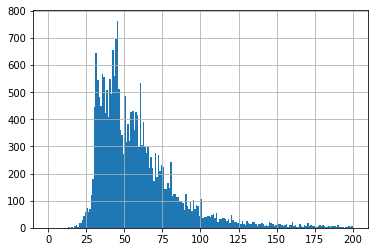

In [499]:
df['total_area'].hist(bins=200, range=(0, 200))

#### Выводы

1. Диграмма шумная.
2. Видны 3 пика, примерно от 30 до 40, от 40 до 48, и от 50 до 60.
3. На данном этапе затрудняюсь назвать что то аномалиями, т.к. на диаграмма шумная и рваная, поэтому любой пик можно трактовать и как аномалию и как некий обоснованный пик значений.

#### Дальнейшие действия
1. Изучу гистограммы отдельно для 1, 2, 3 — комнатных квартир

Графики для 1, 2 и 3-х комнатных квартир


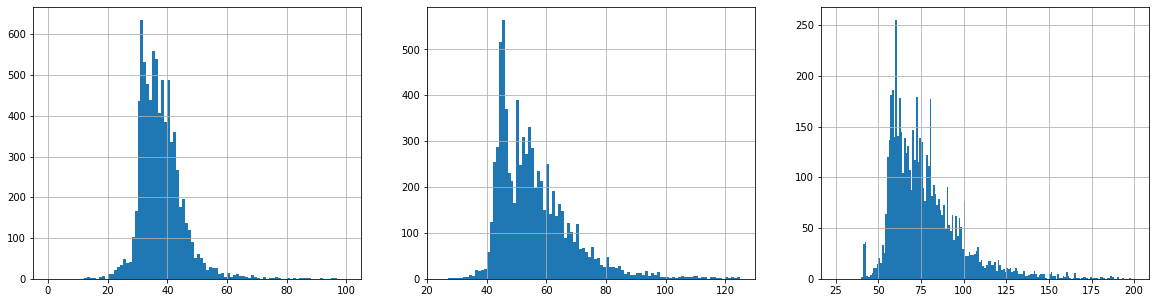

In [500]:
plt.figure(figsize=(20, 5))

print('Графики для 1, 2 и 3-х комнатных квартир')
plt.subplot(1, 3, 1)
df[df['rooms'] == 1]['total_area'].hist(bins=100, range=(0, 100))
plt.subplot(1, 3, 2)
df[df['rooms'] == 2]['total_area'].hist(bins=100, range=(25, 125))
plt.subplot(1, 3, 3)
df[df['rooms'] == 3]['total_area'].hist(bins=175, range=(25, 200))

#### Выводы
1. На всех 3-х гистаграммах повторяются заметные пики примерно в диапазоне "чуть выше минимума".
2. На второй гистограмме виде "провал" примерно на 50м2.
3. На третьей гистограмме есть явная аномалия в диапазон 40-45м2. Назову ее "Аномалия 42", чтобы не запутаться.
4. Все гистограммы по-прежнему шумные.

#### Гипотеза
1. Предположу, что повторяющиеся пики "чуть выше минимума" — это хрущевки.

#### Более глобальные гипотезы
Диаграмма сохраняет шумность даже при разбивке на 1,2,3-комн. квартиры. Из этого выводы.
1. Или датасет гавно, и он собран с систематическими ошибками. Тогда его анализ бессмысленен.
2. Или в этих пиках есть логика. Например то, что дома строились большими сериями с типичными значениями площади в них.

#### Дальнейшие действия
Уточню диапазон пиков и проверю гипотезу о хрущевках.

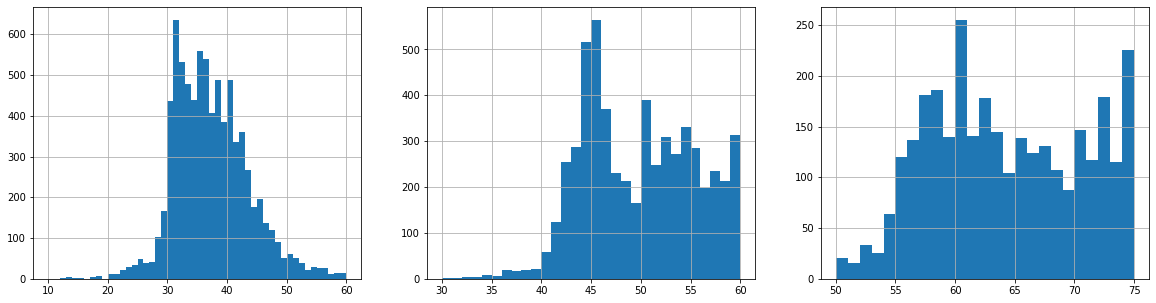

In [501]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
df[df['rooms'] == 1]['total_area'].hist(bins=50, range=(10, 60))
plt.subplot(1, 3, 2)
df[df['rooms'] == 2]['total_area'].hist(bins=30, range=(30, 60))
plt.subplot(1, 3, 3)
df[df['rooms'] == 3]['total_area'].hist(bins=25, range=(50, 75))

**Выводы**
1. Однокомнатные квартиры, пик 31-32м2
2. Двухкомнатные, пик 44-45м2
3. Трехкомнатные, пик 60-62м2

**Дальнейшие действия: проверю высоту домов в полученных диапазонах. Если это хрущевки, этажей будет не более 5.**

In [502]:
df.query('rooms == 1 and (31 <= total_area <= 32)')['floors_total'].median()

5.0

In [503]:
df.query('rooms == 2 and (44 <= total_area <= 45)')['floors_total'].median()

5.0

In [504]:
df.query('rooms == 3 and (60 <= total_area <= 61)')['floors_total'].median()

9.0

#### Вывод
1. Гипотеза не подвтерждается для 3-х комнатных квартир.
2. Но верна для 1 и 2-комнатных квартир.


#### Гипотеза
1. Для всех хрущевок есть типичный параметр: площадь кухни не превышает 6,3м2

#### Дальнейшие действия
1. Посчитаю площадь кухни для выбранных диапазонов

In [505]:
df.query('rooms == 1 and (31 <= total_area <= 32)')['kitchen_area'].median()

6.3

In [506]:
df.query('rooms == 2 and (44 <= total_area <= 45)')['kitchen_area'].median()

6.3

In [507]:
df.query('rooms == 3 and (60 <= total_area <= 61)')['kitchen_area'].median()

6.5

#### Выводы
Гипотеза подтверждается для 1 и 2-комнатных квартир, но не для 3-комнатных. Несмотря на близость значения 6.5 и 6.3, между ними есть принципиальная разница. Хрущевок с площадью кухни больше 6.3 не существует.

#### Гипотеза
Исходя из анализа и внешних источников, полагаю, что пики на гистограммах обоснованы тем, что исторически Санкт-Петербург застраивался сериями домов с типичными значениями площади. Каждая такая серия и дает пик на графике.

#### Проверяю гипотезу

#### Что я сделал на этом этапе анализа (черновик)
1. Я исследовал еще несколько пиков, проверяя типичные значения этажности, площади кухни, ванной и общей.
2. В процессе я не обнаружел каких то системных ошибок или аномалий. 
3. Вопрос "На гистограмме это пики, или аномалии?" оставался открытым.
2. Поэтому я обратился к внешним источникам, чтобы узнать особенности строительства домов в Санкт-Петербурге и сформулировал следующие выводы

#### Строю гистограммы для хрущевок, брежневок и современных домов

Принципиально разделяю их таким образом:
1. Хрущевки — это дом максимум 5 этажей, площадь кухни меньеш 6
2. Брежневки — это дом выше 5 этажей, площадь кухни меньше 7
3. Современные — площадь кухни выше 7

Справка:
Эти цифры я поучил, обратившись к внешним источникам. Маленькая кухня (в основном 6.3м2) считается главным недостатком типовой советской застройки. В большинстве современных домов она больше, порядка 9м2. Поэтому для сегментации домов я использую именно этот параметр.

Я рассмотрел этот вариант и пришел к выводу, что лучше условие "== 5" этажей, а не "< 5".

Причина 1. Потому что все хрущевки, кроме самых первых и последних серий, имели 5 этажей. Первые серии имели 4 этажа, их было построено мало, и сейчас уже большинство снесены. А именно хрущевки в 7-9 этажей — невероятная редкость.

Причина 2. Существуют варианты современного строительства с количеством этажей менее 5. Например, элитные 4-этажные дома с всокими потолками.
    
Руководствуясь этими причинами, и проведя несколько экспериментов, я пришел к выводу, что хрущевки лучше всего выдеяет кобминация условий "этажей == 5 и площадь кухни менее 6".


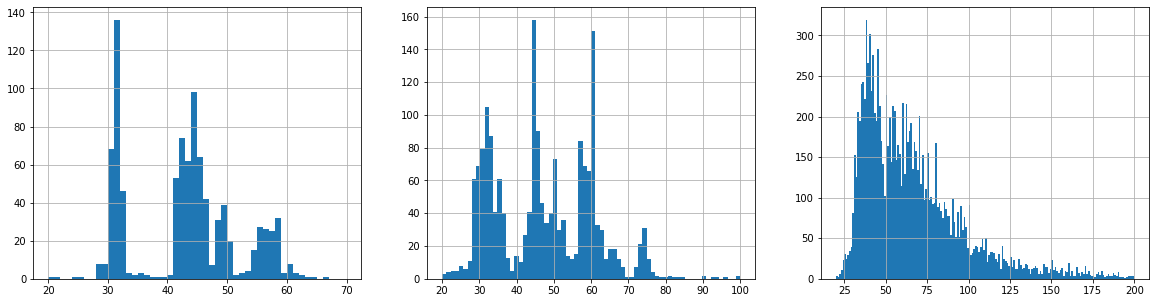

In [508]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1) # КОММЕНТАРИЙ ОТ НАСТАВНИКА: для хрущевок может условие < 5 этажей?
df.query('floors_total == 5 and kitchen_area <= 6 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=50, range=(20, 70))
plt.subplot(1, 3, 2)
df.query('floors_total > 5 and kitchen_area <= 7 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=70, range=(20, 100))
plt.subplot(1, 3, 3)
df.query('kitchen_area > 7 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=180, range=(20, 200))

#### Выводы
1. На первом графике я вижу 3 логичных пика. Это 1, 2 и 3-комнатные квартиры в хрущевках. Пики идеально попадают на типовую площадь. Например, 1-комнатные в хрущевке — это 31-33м2.
2. На втором графике также есть 3 пика (сдвинутые немного вправо), плюс добавляется 4-й. Это подтверждает гипотезу, что это брежневки. Именно в этих домах появились 4-комнатные квартиры. Также их площадь была немного больше.
3. На 3-м графике почти нормальное распределение. Это логично, без типового строительства каждый застройщик выбирает желаемую планировку будущих квартир. Эта гистограмма по прежнему шумная, но причина этого в малом кол-ве значений.
4. На 3-м графике есть провал примерно на 50м2. Прежде, чем деать окончательные выводы, исследую это.

#### Построю гистограммы современной застройки, разделив их на 1, 2, 3-комнатные квартиры


Причина рваности графика в том, что он являетс ярезультатом наложения множества гистограмм

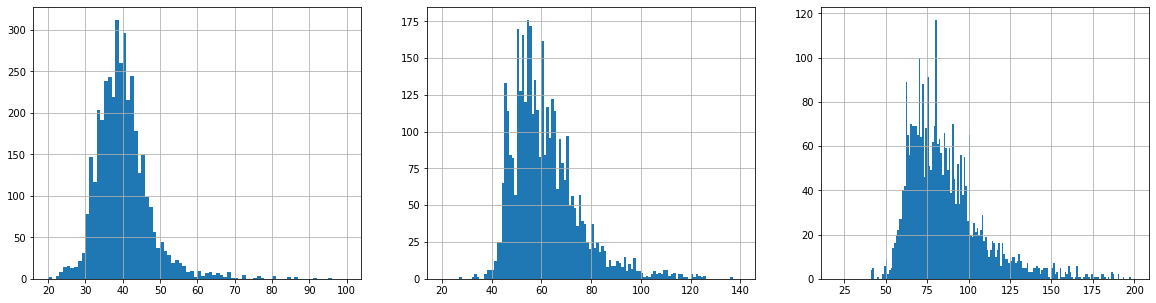

In [509]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
df.query('kitchen_area > 7 and rooms == 1 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=80, range=(20, 100))
plt.subplot(1, 3, 2)
df.query('kitchen_area > 7 and rooms == 2 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=120, range=(20, 140))
plt.subplot(1, 3, 3)
df.query('kitchen_area > 7 and rooms == 3 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=180, range=(20, 200))

#### Выводы
1. Вот это уже похоже на правду. Распредление на всех графиков тяготеет к нормальному.
2. Шумность 2-го и 3-го графика объясняется прежде всего малым кол-вом значений.

#### Гипотеза о пиках и провалах
1. На втором графике виден провал в районе 50м2. Видно, что провал на общем графике получился благодаря именно 2-комнатным квартирам. Логически это легко объяснимо. 
2. 50м2 для однушки — это много, для трешки — мало, а для 2-комнатной квартиры идеально все, что выше психологического порога в 50м2.
3. Предполагаю, что в этом же причина пиков после 35, 60, 75, 80, 90, 100 и 120м2.
4. Выводы по Санкт-Петербургу справедливы и для Ленинградской области, но с условием того, что старого жилог офонда в области больше,чем в Санкт-Петербурге

### Аномалия total_area(40-42) (1)

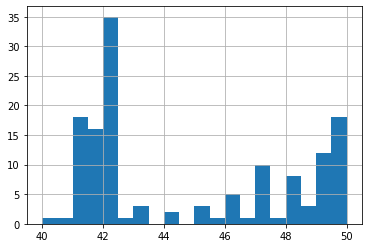

In [510]:
df[df['rooms'] == 3]['total_area'].hist(bins=20, range=(40, 50))

#### Выводы
Диапазон аномалии: 40-42м2.
    
#### Определю точный объем значений

In [511]:
df.query('total_area >=40 and total_area <= 42 and rooms == 3')['total_area'].count()

68

#### Выводы
1. 68 значений — это 0,3% от датасета
2. Считаю неразумным тратить хоть какие то усилия на аномалию "объемом" 0,3%

#### Дальнейшие действия
Удаляю

In [512]:
# Код для проверки объема датасета после удаления аномалии

df['total_area'].count() - df.query('(total_area >=40 and total_area <= 42 and rooms == 3)')['total_area'].count()

23582

In [513]:
# Удаляю аномалию и считаю кол-во строк для проверки корректности

df.query('not(total_area >=40 and total_area <= 42 and rooms == 3)')['total_area'].count()

23582

In [514]:
# Вопрос куратору

print('Если создаю срез с помощью query:', df.query('(41 >= total_area < 43) and rooms == 3')['total_area'].count())
print('Если создаю буллев массив и передаю его df:', df[(df['total_area'] >= 41) & (df['total_area'] < 43) & (df['rooms'] == 3)]['total_area'].count())

Если создаю срез с помощью query: 10
Если создаю буллев массив и передаю его df: 70


### Определю и удалю выбросы

In [515]:
# Эта функция определяет границы нормального размаха
# За верхнюю границу принимается значение, равно третьему квантилю + 1,5 межквартильного размаха
# За нижнюю первый квантиль + 1,5 межквартильного размаха, или 0, если значение отрицательное

def border_normal_range(df, column):
    index = ['Нижняя граница', 'Первый квантиль', 'Второй квантиль', 'Третий квантиль', 'Верхняя граница', 'Межквартильный размах', 'Значений выше границы', 'Значений ниже границы']
    values = []
    
    border_down = df[column].quantile(.25) - ((df[column].quantile(.75) - df[column].quantile(.25)) * 1.5)
    q1 = df[column].quantile(.25)
    q2 = df[column].quantile(.5)
    q3 = df[column].quantile(.75)
    border_up = df[column].quantile(.75) + ((df[column].quantile(.75) - df[column].quantile(.25)) * 1.5)
    interquartile_range = df[column].quantile(.75) - df[column].quantile(.25)
    sum_values_border_up = df[df[column] > border_up][column].count()
    sum_values_border_down = df[df[column] < border_down][column].count()
    
    if border_down < 0:
        values.append(0)
    else:
        values.append(border_down)
    values.append(q1)
    values.append(q2)
    values.append(q3)
    values.append(border_up)
    values.append(interquartile_range)
    values.append(sum_values_border_up)
    values.append(sum_values_border_down)
    border_normal_range = pd.Series(values, index=index)
    
    return border_normal_range

In [516]:
border_normal_range(df, 'total_area')

Нижняя граница              0.00
Первый квантиль            40.00
Второй квантиль            52.00
Третий квантиль            69.70
Верхняя граница           114.25
Межквартильный размах      29.70
Значений выше границы    1244.00
Значений ниже границы       0.00
dtype: float64

#### Выводы
1. Выше верхней границы 1244 значений — это примерно 5% датасета, что много.
2. Верхняя граница определена в 114м2, что объективно мало. В современном дорогом (это важно) доме 120м2 для 4-х конматной квартиры — это нормально.

#### Узнаю границы для современных домов

In [517]:
# Критерий выделения современных домов: площадь кухни больше 7

border_normal_range(df[df['kitchen_area'] > 7], 'total_area')

Нижняя граница             0.0
Первый квантиль           41.0
Второй квантиль           56.0
Третий квантиль           75.0
Верхняя граница          126.0
Межквартильный размах     34.0
Значений выше границы    917.0
Значений ниже границы      0.0
dtype: float64

#### Верхняя граница поднялась до 126м2
1. Что лично я считаю, все равно мало
2. В примере с АЗС из тренажера заправки свыше 30000с говорили об каком то специфическом объекте.
3. В этом проекте квартира площадь 126м2 — это нормально для современного 4-комнатного дома.

#### Проверю границы отдельно для 1, 2, 3 и 4 комнатных квартир

In [518]:
# Здесь в коде я менял кол-во комнат, чтобы получить верхнюю и нижнюю границу нормального размаха
# Но оставил только код для 2-х комнатных квартир, чтобы уменьшить объем документа

border_normal_range(df[(df['rooms'] == 2) & (df['kitchen_area'] > 7)], 'total_area')

Нижняя граница            31.0
Первый квантиль           51.4
Второй квантиль           57.0
Третий квантиль           65.0
Верхняя граница           85.4
Межквартильный размах     13.6
Значений выше границы    231.0
Значений ниже границы      2.0
dtype: float64

**Удаляю выбросы для каждой категории квартир:**

In [519]:
df = df.query('~(rooms == 1 and kitchen_area > 7 and (total_area < 24.5 or total_area > 52.5))')

In [520]:
df = df.query('~(rooms == 2 and kitchen_area > 7 and (total_area < 31 or total_area > 85.4))')

In [521]:
df = df.query('~(rooms == 3 and kitchen_area > 7 and total_area > 126.5)')

In [522]:
df = df.query('~(rooms == 4 and kitchen_area > 7 and total_area > 200.75)')

In [523]:
df = df.query('~(rooms > 4 and kitchen_area > 7 and total_area > 371)')

**Построю сводные таблицы, в которых будет кол-во квартир в продаже для каждой группы и их средняя площадь**

```
1. В ячейке ниже созданы 3 сводные таблицы, по-порядку: хрущевки, брежневки, современные дома
2. Для выделения групп, использована комбинация параметров "клощадь кухни" и "высота потолков"
```

In [524]:
hrush = (df
     .query('locality_name == "Санкт-Петербург" and kitchen_area <= 6.3 and floors_total <= 5 and ceiling_height < 2.7')
     .pivot_table(index='rooms', values=['total_area'], aggfunc=['median', 'count'])
)

breznev = (df
     .query('locality_name == "Санкт-Петербург" and kitchen_area <= 7 and floors_total >= 7 and ceiling_height <= 2.7')
     .pivot_table(index='rooms', values=['total_area'], aggfunc=['median', 'count'])
)

sovremen = (df
     .query('locality_name == "Санкт-Петербург" and kitchen_area > 7 and floors_total >= 4 and ceiling_height >= 2.7')
     .pivot_table(index='rooms', values=['total_area'], aggfunc=['median', 'count'])
)

```
В ячейке ниже все 3 таблицы собраны в одну с сохранением порядка: хрущевки, брежневки, современные дома.
```

In [525]:
live_fond = hrush.merge(breznev, on='rooms')
live_fond = live_fond.merge(sovremen, on='rooms')
#example = example[['хрущевка_площадь', 'хрущевок_в_продаже', 'брежневка_площадь', 'брежневок_в_продаже', 'современные_площадь', 'современных_в_продаже', ]]
live_fond

,median_x,count_x,median_y,count_y,median,count
,total_area,total_area,total_area,total_area,total_area,total_area
rooms,,,,,,
1,31.0,187,32.1,570,39.55,2691
2,44.4,261,45.8,561,60.40,2619
3,56.0,143,60.0,538,83.35,2244
4,49.0,42,74.0,71,112.60,653


**Выводы о количестве квартир**

1. Хрущевок осталось не так уж и много. Например, 2-х комнатных современных квартир в датасете 2619, брежневок 561, а хрущевок всего 261. На 1-у хрущевку приходится 10 современных квартир и 2 брежневки.
2. В хрущевках кол-во 1-о и 3-комнатных квартир существенно меньше, чем 2-комнатных. Это логично, потому что в проектах хрущевок однокмонатных квартир было меньше всего. Например, в типовой 335 серии на одном этаже из 12 квартир только 2 были однокомнатными.
3. В брежневках распределение квартир (по признаку кол-ва комнат) практически равное. 4-комнатные редки, всего 71.
4. В современных домах картина практически такая же, но доля 3-х комнатных несколько меньше, а 4-комнатных больше. Предположу, что это объясняется составом семей, временем рождения детей и финансовыми возможностями. Молодой семье на "старте" выгоднее жить в 1-о или 2-комнатной. А с ростом семью и фактом "ипотека до конца жизни" многие предпочитают вожиться и купить сразу 4 комнаты. Что вдвойне разумно и потому, что стоимость кв.м. падает с ростом квадратуры. 


**Выводы по пощади квартир**

1. Интересный факт — площадь брежневок больше площади хрущевок всего на 1-4 кв.м. (кроме 4-х комнатных, но это исключение). Исторически, именно так и было. Брежневки лучше по планировке (нет проходных комнаты), в них выше потолки (2,7 м против 2,5), но весь прирост площади пришелся на увеличенную на 1 кв.м. кухню. В 3-комнатных квартирах еще и на увеличенную спальню.
2. Современная однушка на 7,5 кв.м. больше брежневки. 
3. Двушка на целых 15 кв.м. Интересно, что именно такая площадь была у гостинной в хрущевках. 
4. 3-комнатные квартиры больше на 23 кв.м.

### 2. Изучаю цену продажи

In [526]:
# Округлю значение цены в меньшую сторону

df['last_price']  = df['last_price'] / 1000000

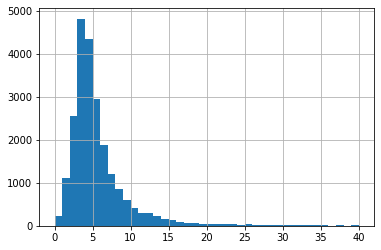

In [527]:
# Строю гистограмму
df['last_price'].hist(bins=40, range=(0, 40))

#### Выводы
Красивое нормальное распределение. Имеет смысл только удалить выбросы.

#### Определю границы нормального распределения

In [528]:
border_normal_range(df, 'last_price')

Нижняя граница              0.00
Первый квантиль             3.40
Второй квантиль             4.58
Третий квантиль             6.50
Верхняя граница            11.15
Межквартильный размах       3.10
Значений выше границы    1798.00
Значений ниже границы       0.00
dtype: float64

**Верхняя граница нормального размаха: 11.31 млн.**

**Удаляю выбросы**

In [529]:
df = df.query('not(last_price > 11.31)')

In [530]:
df['last_price'].count()

21042

**Построю аналлогичную гистограмму для цены за кв.м.**

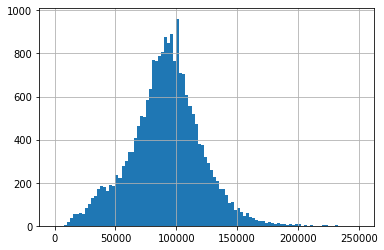

In [531]:
df['price_m2'].hist(bins=100, range=(0, 250000))

**Такое же красивое нормальное распределение.** Небольшой провал перед ценой 100 тыс. за кв.м. и далее пик после этой цифры объясняет, прежде всего, психологией выставления цены.

**Далее определю границы нормального размаха и удалю выбросы,** аналогично тому, как я поступил с ценой продажи.

In [532]:
border_normal_range(df, 'price_m2')

Нижняя граница            22657.875
Первый квантиль           74172.750
Второй квантиль           92156.000
Третий квантиль          108516.000
Верхняя граница          160030.875
Межквартильный размах     34343.250
Значений выше границы       287.000
Значений ниже границы       230.000
dtype: float64

In [533]:
df = df.query('not(price_m2 > 159622)')
df = df.query('not(price_m2 < 23118)')

In [534]:
df['price_m2'].count()

20511

**Выводы**

1. Наибольшее количество квартир продается в ценовом диапазон от 3,4 млн до 6,5 млн. Это межквартильный размах, в который попадает 50% все проданной недвижимости.
2. Типичная цена за кв.м. — от 74 до 108 тыс. рублей.

### 3. Число комнат

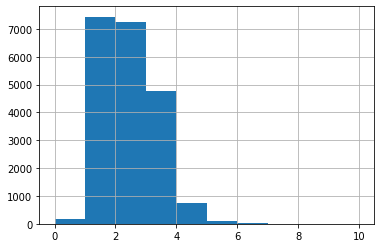

In [535]:
df['rooms'].hist(bins=10, range=(0, 10))

#### Выводы
Вижу квартиры с 0-нулем комнат.

#### Гипотеза
Это или ошибка в данных, или в этих квартирах есть только ванная и балкон.

In [536]:
df[df['rooms'] == 0]

,locality_name,city_centers_nearest,airports_nearest,parks_nearest,parks_around_3000,ponds_nearest,ponds_around_3000,floors_total,floor,rooms,total_area,kitchen_area,living_area,studio,open_plan,balcony,ceiling_height,is_apartment,first_day_exposition,days_exposition,total_images,last_price,price_m2,floor_category,ratio_area_living_to_total,ratio_area_kitchen_to_total,day_exposition,month_exposition,year_exposition
144,Муриный,21888,51553,399,0,133,2,24,2,0,27.00,8.25,15.50,True,False,2,2.70,False,2017-03-30,181,1,2.450,90740,другой,0.574074,0.305556,3,3,2017
349,Кудрово,28858,36559,399,0,444,1,14,1,0,25.00,8.25,17.00,False,True,0,2.75,False,2017-09-27,45,4,2.320,92800,первый,0.680000,0.330000,2,9,2017
440,Санкт-Петербург,15015,38171,460,0,982,2,17,4,0,27.11,8.25,24.75,True,False,2,2.70,False,2018-03-12,64,8,2.480,91479,другой,0.912947,0.304316,0,3,2018
508,Парголовый,19292,53115,733,0,593,1,26,19,0,34.40,8.25,24.30,False,True,1,2.64,False,2017-03-28,430,0,3.375,98110,другой,0.706395,0.239826,1,3,2017
608,Шушар,24212,17427,399,0,584,0,10,7,0,25.00,8.25,17.20,True,False,0,2.63,False,2019-02-20,29,2,1.850,74000,другой,0.688000,0.330000,2,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,13222,11405,460,0,623,1,25,16,0,26.00,8.25,18.00,True,False,0,2.70,False,2017-09-01,14,7,3.200,123076,другой,0.692308,0.317308,4,9,2017
23442,Муриный,21888,51553,399,0,133,2,24,4,0,27.70,8.25,18.00,False,True,2,2.70,False,2017-09-28,4,0,2.500,90252,другой,0.649819,0.297834,3,9,2017
23554,Санкт-Петербург,17092,18090,460,0,112,2,19,8,0,26.00,8.25,17.20,True,False,0,2.70,False,2018-09-07,31,15,3.350,128846,другой,0.661538,0.317308,4,9,2018
23592,Никольское,28858,36559,399,0,444,1,9,8,0,29.00,8.25,18.00,False,True,2,2.56,False,2017-11-11,82,10,1.450,50000,другой,0.620690,0.284483,5,11,2017


In [537]:
df[df['rooms'] == 0]['studio'].mean()

0.7

In [538]:
df[df['rooms'] == 0]['total_area'].median()

26.025

#### Выводы
1. 70% — это студии.
2. Медиана площади 26, что также соответствует небольшой квартире студии.
3. **Интересный момент.** Во всех строках, где квартира не помечена как студия, для нее указана "свободная планировка". Т.е. это либо студия, или свободная планировка. Но свободная планировка для квартиры до 30м2 как раз и означает, что это квартира-студия без внутренних стен.
4. Исходя из выводов выше, считаю, что поставить 0 в "количестов комнат" — это специфика мышления неких индивидов, а не ошибка в данных.

#### Дальнейшие действия
Заменю значение с 0 на 1. Потому что это отвечает логике здравого смысла.

In [539]:
df[df['rooms'] == 0] = 1

**Какое количество комнат наиболее популярно по продажам?**

In [540]:
df['rooms'].value_counts()

1    7629
2    7265
3    4763
4     730
5     111
6      12
7       1
Name: rooms, dtype: int64

**Наиболее популярны по продажам 1 и 2-комнатные квартиры.** Разница между ними составлет всего около 200 проданных квартир.

**Посмотрим разрез в контексте по типам домов: хрущевки, брежневки, современные дома**

In [541]:
live_fond # В этйо переменной хранится сводная таблица

,median_x,count_x,median_y,count_y,median,count
,total_area,total_area,total_area,total_area,total_area,total_area
rooms,,,,,,
1,31.0,187,32.1,570,39.55,2691
2,44.4,261,45.8,561,60.40,2619
3,56.0,143,60.0,538,83.35,2244
4,49.0,42,74.0,71,112.60,653


**В современных домах наиболее популярны 1-комнатные квартиры: 2512 продаж против 2332 у двухкомнатных, идущих на 2-м месте**

### 4. Высота потолков

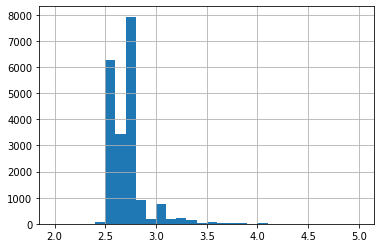

In [542]:
df['ceiling_height'].hist(bins=30, range=(2, 5))

#### Выводы
1. Вижу ожидаемое распределение. Пики на значениях 2.5, 2.7, 3.0 метра.
2. Намного меньше остальных значений в диапазон 2.5 - 3.0 метра, что логично.
3. Значения выше 3м редки, но я не считаю их выбросами, потому что дома с такой высотой потолков существуют и строятся. Их на рынке немного, что и отражает данная гистограмма.
4. Есть значения менее 2.5 м.

#### Дальнейшие действия
Сравню медианные значения квартир с потолками выше 3 м и всеми остальными

In [543]:
ceiling_height_up_3m = df[df['ceiling_height'] > 3].median().reset_index()
ceiling_height_down_3m = df[df['ceiling_height'] <= 3].median().reset_index()

ceiling_height = ceiling_height_up_3m.merge(ceiling_height_down_3m, on='index', suffixes=('_выше_3м', '_ниже_3м'))
ceiling_height['up_per_down'] = ceiling_height['0_выше_3м'] / ceiling_height['0_ниже_3м']
ceiling_height

,index,0_выше_3м,0_ниже_3м,up_per_down
0,city_centers_nearest,5253.500000,15791.000000,0.332690
1,airports_nearest,24404.500000,35151.000000,0.694276
2,parks_nearest,456.000000,460.000000,0.991304
3,parks_around_3000,1.000000,0.000000,inf
4,ponds_nearest,503.000000,503.000000,1.000000
5,ponds_around_3000,1.000000,1.000000,1.000000
6,floors_total,5.000000,9.000000,0.555556
7,floor,3.000000,4.000000,0.750000
8,rooms,3.000000,2.000000,1.500000
9,total_area,70.500000,48.000000,1.468750


In [544]:
print('Количество квартир с потолком выше 3 м:', df[df['ceiling_height'] > 3]['ceiling_height'].count())

Количество квартир с потолком выше 3 м: 818


#### Квартиры с потолками выше 3 м объединяет следующее: 
1. Они в 3 раза ближе к центру, чем остальные
2. Меньше этажность
3. Больше комнат, больше площадь (на 70%), больше кухня
4. Цена выше в 2 раза, цена за м2 выше на 20%

#### Вывод: это не аномалия данных, а элитная застройка. Данный сегмент считаю нужным сохранить в датасете. Но проверить верхнюю границу на выбросы.

In [545]:
df['ceiling_height'].describe()

count    20511.000000
mean         2.682557
std          0.792821
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

#### Верхняя граница нормального распределения — 4,6 метра.
1. Это нормально и ожидаемо.
2. Максимальное значение равно 100 м, что явно некорректно. Если это только не апартаменты под шатром цирка.
3. Проверю, сколько объектов выше 4,6 м.

In [546]:
df[df['ceiling_height'] > 4.6]['ceiling_height'].count()

28

#### 32 квартиры
Удаляю их. Это или ошибка в данных, или специфическая застройка.

In [547]:
df["ceiling_height"].count()

20511

In [548]:
df = df.query('not ceiling_height > 4.6')

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20483 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality_name                20483 non-null  object 
 1   city_centers_nearest         20483 non-null  int64  
 2   airports_nearest             20483 non-null  int64  
 3   parks_nearest                20483 non-null  int64  
 4   parks_around_3000            20483 non-null  int64  
 5   ponds_nearest                20483 non-null  int64  
 6   ponds_around_3000            20483 non-null  int64  
 7   floors_total                 20483 non-null  int64  
 8   floor                        20483 non-null  int64  
 9   rooms                        20483 non-null  int64  
 10  total_area                   20483 non-null  float64
 11  kitchen_area                 20483 non-null  float64
 12  living_area                  20483 non-null  float64
 13  studio          

### Проверю квартиры с потолками ниже 2.5 м

In [550]:
df[df['ceiling_height'] < 2.5]['ceiling_height'].count() # Количество квартир с потолком ниже 2.5 м

262

#### Выводы
1. Сегмент ничтожно мал, всего 1%
2. Потолов ниже 2.5 м нет даже в хрущевках. Так что это какая то очень специфическая застройка. 
3. Смысла сохранять этот сегмент не вижу. На решение поставленной задачи он никак не повлияет, разве что добавит "шумов".

#### Удаляю

In [551]:
df = df.query('not(ceiling_height < 2.5)')

### 5. Срок продажи квартиры

### Исследую гистограмму

Среднее: 152.0
Медиана: 92.0


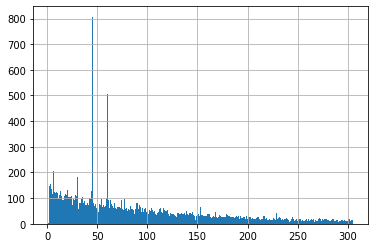

In [552]:
df['days_exposition'].hist(bins=300, range=(1, 305))
print('Среднее:', df['days_exposition'].mean().round(0))
print('Медиана:', df[df['days_exposition'] > 0]['days_exposition'].median())

**Выводы: Есть 6 явных аномалий**

**Конкретизирую аномалии:**

Аномалии


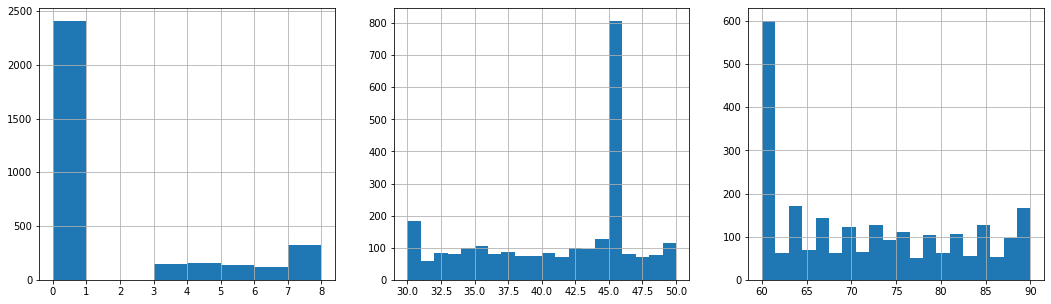

In [553]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
df['days_exposition'].hist(bins=8, range=(0, 8))

plt.subplot(1, 3, 2)
df['days_exposition'].hist(bins=20, range=(30, 50))

plt.subplot(1, 3, 3)
df['days_exposition'].hist(bins=20, range=(60, 90))
print('Аномалии')

#### Выводы
1. Все 6 аномалий — это 6 конкретных цифр, а не сегментов от и до
2. Аномальные сроки размещения — 0 дней, 1 день, 7 дней, 30, 45, 60 и 89.
3. Такие ровные числа наводят меня на мысль, что это связано с условиями размещения объявлений.

#### Обратившись к «Условиям размещения объявлени», я узнал:
1. Для собственников есть 3 срока размещения бесплатных объявлений: 45, 60 и 90 дней в зависимости от цены, плюс платное объявление 30 дн.
2. И хотя числа 45 и 60 дней сейчас не актуальны для Питера (только для регионов), предполагаю, что на 2017-2018 было именно так.

#### Аномалии на 7, 30, 45, 60 и 89 днях оставлю в датасете
- Потому что данные из этого столбца мне понадобятся только 1 раз при ответе на вопрос "Сколько обычно занимает продажа квартиры?". Для ответа на этот вопрос я исключу их из расчета — это проще, чем заменять. 
- В данном конкретном случае это допустимо, потому что заполнив аномалии средними значениями, на выходе я получу такие же квантили для определния обычного времени продажи.
- Также не буду удалять, потому что объем этих аномалий — 4176 строк датасета. Это очень много и удалять эти строки из-за столбца, который я использую 1 раз неразумно.

#### Аномалия days_exposition(0)

**Гипотеза. Это еще не проданные квартиры, поэтому у них и нет срока продажи.**
Напомню, что это я заменил NaN на 0 при предобработке данных для удобства. На месте 0 по факту пустое значение = нет срока продажи.

**Посмотрю распределение объявлений из аномалии по годам и месяцам:**

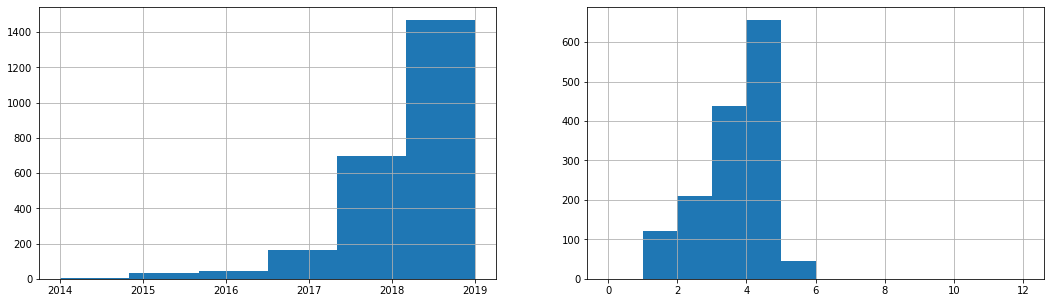

In [554]:
# Строю 2 гистограммы, для года и месяца публикации объявлений из аномалии

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
df[df['days_exposition'] == 0]['year_exposition'].hist(bins=6, range=(2014, 2019))

plt.subplot(1, 2, 2)
df[(df['days_exposition'] == 0) & (df['year_exposition'] == 2019)]['month_exposition'].hist(bins=12, range=(0, 12))

#### Гипотеза подтверждена, квартиры из аномалии еще не проданы
1. Этих квартир становится больше к последним датам из датасета

#### Проверю, есть ли в принципе населенные пункты, в которых ни продано ни одной квартиры

In [555]:
(df
     .pivot_table(index='locality_name', values='days_exposition', aggfunc='mean')
     .sort_values(by='days_exposition', ascending=True)
     .head(5)
)

,days_exposition
locality_name,
Кривко,0.0
Мыза,0.0
Меньковый,0.0
Дзержинский,0.0
Пчев,0.0


#### Такие населенные пункты есть
Предполагаю, что это непопулярные геолокации. Удаляю их.

In [556]:
# В этой ячейке получаю список поселков, в которых нет ни одной продажи

black_list_days_exposition_locality_name = (df
     .pivot_table(index='locality_name', values='days_exposition', aggfunc='mean') # Получаю среднее время продажи квартиры
     .query('days_exposition == 0') # Получаю срез поселков, в которых не продано ни одной квартиры
     .reset_index()['locality_name'] # Переприсваиваю индексы + беру серию с названием населенных пунктов
     .tolist() # Создаю из них список
)

In [557]:
df = df.query('locality_name not in @black_list_days_exposition_locality_name') # Удаляю поселки, в которых не продано ни одной квартиры

### Определяю выбросы

In [558]:
# Создаю таблицу без аномальных значений

df_without_anomalies_in_days_exposition = df.query('days_exposition not in (0, 7, 30, 45, 60, 89)')

In [559]:
# Получаю значение верхней границы

border_normal_range(df_without_anomalies_in_days_exposition, 'days_exposition')

Нижняя граница              0.0
Первый квантиль            43.0
Второй квантиль           109.0
Третий квантиль           244.0
Верхняя граница           545.5
Межквартильный размах     201.0
Значений выше границы    1199.0
Значений ниже границы       0.0
dtype: float64

#### Верхняя граница 545 дней. Квартир, которые продавались дольше — 1223.

### Определяю, сколько обычно занимает продажа

1. В задаче поставлен вопрос "Опишите, сколько обычно занимает продажа?".
2. Я трактую слово «обычный»  как число дней, равное межквартильному размаху. 
3. Эта трактовка равнозначна формулировке: «С вероятностью 50% квартира будет продана за этот срок».

In [560]:
df_without_anomalies_in_days_exposition.query('days_exposition < 542.5')['days_exposition'].describe()

count    14811.000000
mean       138.283100
std        127.243963
min          1.000000
25%         40.000000
50%         97.000000
75%        198.000000
max        542.000000
Name: days_exposition, dtype: float64

#### 150 дней или 6 месяцев — столько обычно занимает продажа квартиры
Межвартильный размах, без аномалий и сверхбольших выбросов, равен 152 дням.

## Блок задач 2 (задача 2 из ТЗ). Изучение взаимосвязей

**Превью**
1. Как зависит цена от площади (цена общая и кв.м.)?
2. Как зависит цена от количества комнат?
3. Как зависит цена от удаленности от центра?
4. Как зависит цена от этажа?
5. Как зависит цена от даты размещения: дня, недели, года?

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ ОТ НАСТАВНИКА:</b> 

Можно построить табличку корреляций признака price_m2 и last_price:
    
    df.corr()[['last_price', 'price_m2']].sort_values('price_per_area')
</div>

### 1. Как зависит цена от площади?

#### Цена за кв.м.

График зависимости цены за кв.м. от площади квартиры
Коэффициент корреляции равен:  -0.1012911106876209


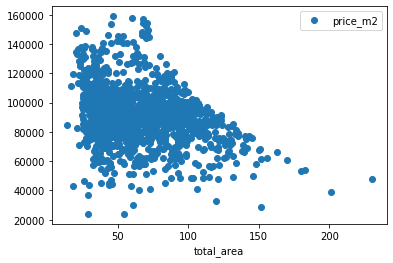

In [561]:
# Создаю копию таблицы для использования конкретно в этой ячейке (чтобы не изменять основной датасет)

df_bufer = df
df_bufer['total_area'].round(0) # Округляю в ней значения общей площади


(df_bufer
     .pivot_table(index='total_area', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='total_area', y='price_m2', style='o')
)

print('График зависимости цены за кв.м. от площади квартиры')
print('Коэффициент корреляции равен: ', df['total_area'].corr(df['price_m2']))

**Вывод: чем больше общая площадь, тем ниже цена за кв.м.**

### 2. Как зависит цена от количества комнат?

График зависимости цены от числа комнат
Коэффициент корреляции равен:  0.4975382897140883


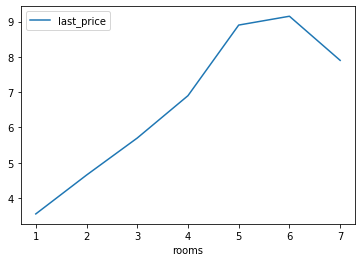

In [562]:
(df
     .pivot_table(index='rooms', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='rooms', y='last_price')
)

print('График зависимости цены от числа комнат')
print('Коэффициент корреляции равен: ', df['last_price'].corr(df['rooms']))

**Вывод: чем больше комнат, тем выше цена.**
- Исключение — 7-комнатные квартиры. Их цена ниже 6-комнатных.

### 3. Как зависит цена от удаленности от центра?

In [563]:
# Окргуляю значения переменной "расстояние до центра" до 1 км

df['city_centers_nearest'] = (df['city_centers_nearest'] / 1000).round(0)

Коэффициент корреляции равен:  -0.5915195018513417


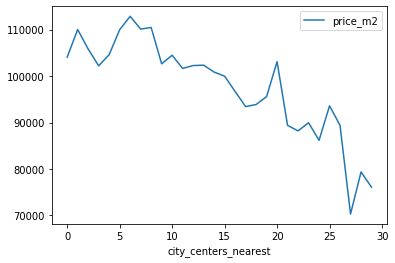

In [564]:
# Создаю срез данных «только объявления из Санкт-Петербурга»
# Расчитываю медину цены за кв.м. для каждого километра
# Строю график

(df
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='city_centers_nearest', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='city_centers_nearest', y='price_m2')
)

print('Коэффициент корреляции равен: ', df['city_centers_nearest'].corr(df['price_m2']))

**Очевидный вывод: Чем ближе к центру города, тем выше цена квартиры**
- Более детальные выводы описываю ниже в последнем блоке задания, т.к. поставленная там задача фактически дублирует эту.

### 4. Как зависит цена квартиры от этажа?

**Построю гистограммы, чтобы визуально найти отличия**

Первый, последний, другой этаж


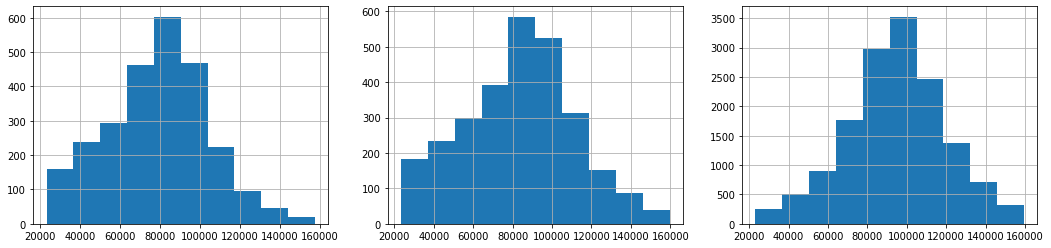

In [565]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
df[df['floor_category'] == 'первый']['price_m2'].hist()

plt.subplot(1, 3, 2)
df[df['floor_category'] == 'последний']['price_m2'].hist()

plt.subplot(1, 3, 3)
df[df['floor_category'] == 'другой']['price_m2'].hist()

print('Первый, последний, другой этаж')

**Визуально различия есть** 
- У квартир на первом и последнем этаже пик цены наблюдается в диапазон 75-100 тыс. за кв.м.
- Для квартир на других этажах пик сдвинут вправо по цене, от 80 до 110 тыс. руб.

**Построю сводную таблицу, чтобы видеть цифры:**

In [566]:
(df.pivot_table(index='floor_category', values='price_m2', columns='rooms' )/1000).reset_index().round(0)

rooms,floor_category,1,2,3,4,5,6,7
0,другой,101.0,95.0,86.0,82.0,75.0,78.0,NaN
1,первый,87.0,77.0,75.0,74.0,76.0,70.0,NaN
2,последний,89.0,81.0,80.0,79.0,74.0,61.0,39.0


**Вывод: Первый и последний этаж дешевле остальных.**
- Первый
- Второй

### 5. Как зависит цена от даты размещения?

#### Динамика по годам

Динамика цены за кв.м.


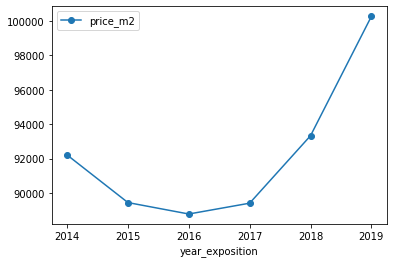

In [567]:
(df
     .pivot_table(index='year_exposition', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='year_exposition', y='price_m2', style='o-')
)
print('Динамика цены за кв.м.')

**Выводы**
1. На графике видно снижение цены за кв.м. с 2014 по 2016 года. Подъем цены с 2017 по 2019 год. Что соответствует датам «кризиса» в экономике после событий 2014 года. Видно, что восстановление экономики началось в конце 2016 года.
2. За 5 лет, несмотря на временное падение, цена недвижимости выросла на 8,5%.

**Построю также график для общей цены квартиры:**

Динамика общей цены продажи квартиры


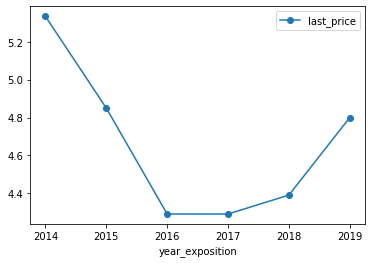

In [568]:
(df
     .pivot_table(index='year_exposition', values='last_price', aggfunc='median')
     .reset_index()
     .plot(x='year_exposition', y='last_price', style='o-')
)
print('Динамика общей цены продажи квартиры')

**Выводы**
1. На графике видно снижение с 2014 по 2016 года и подъем с 2017 по 2019 год, как и на графике цены за кв.м.
2. Но, в отличии от цены за кв.м., продажная цена квартир снизилась на 10,8%, в то время как цена за кв.м. увеличилась на 8,5%.
3. Также, интересный момент, на дне падения в 2016 году средняя цена квартиры составляла 77% от цены пика, в то время как цена за кв.м. снизилась всего на 2,8%. Это говорит о том, что в эти годы продавали, преимущественно, дешевые квартиры небольшой площади. Владельцы дорогой недвижимости предпочли сохранить ее до повышения цен. 

**Гипотеза по 2-второму выводу**
Снижение цены квартиры при увеличении стоимости кв.м. говорит о том, что квартиры стали и меньше, и дороже за ту же площадь. Проверю это, рассчитав изменение площади.

Изменение площади квартир с 2014 по 2019 годы


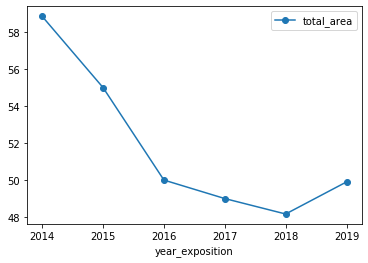

In [569]:
(df
     .pivot_table(index='year_exposition', values='total_area', aggfunc='median')
     .reset_index()
     .plot(x='year_exposition', y='total_area', style='o-')
)
print('Изменение площади квартир с 2014 по 2019 годы')

**Гипотеза подтверждается.** Начиная с 2014 года застройщики уменьшают площадь квартир для сохранения приемлемой цены продажи.

#### Как изменяется цена от месяца к месяцу

Динамика цены за кв.м.


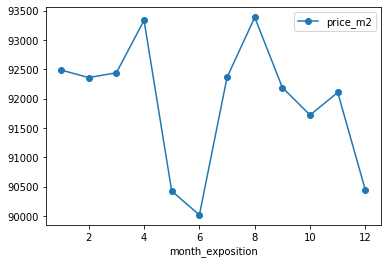

In [570]:
(df
     .pivot_table(index='month_exposition', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='month_exposition', y='price_m2', style='o-')
)
print('Динамика цены за кв.м.')

**Выводы**
1. Цена снижается с приближением лета, с апреля по июнь. Разница между пиком в конце марта и минимальной ценой в июне составляет 3,7%.
2. Летом цена плавно повышается до околомартовских значений.
3. Далее спад до октября. После короткого октябрьского повышения снова спад в ноябре и декабре, перед новым годом.
4. **Самые выгодные месяцы для покупки: июнь и декабрь. В апреле и августе цена максимальная.**

#### Как зависит цена от дня размещения объявления

Динамика цены за кв.м.


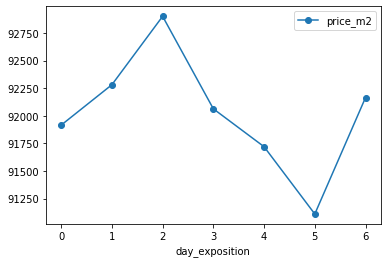

In [571]:
(df
     .pivot_table(index='day_exposition', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='day_exposition', y='price_m2', style='o-')
)
print('Динамика цены за кв.м.')

**В среду цена максимальная, в субботу минимальная, разница между этими днями 2%**. При цене квартиры, например, в 4 млн. руб, 2% — это 80 тыс. руб. Так что не знаю, кому поможет эта информация.

## Блок задач 3. ТОП-10 населенных пунктов

In [572]:
# Создаю серию из ТОП-10 населенных пунктов, сгруппированных по количеству объявлений

popular_locality_name = (df
     .pivot_table(index='locality_name', values='balcony', aggfunc='count')
     .sort_values('balcony', ascending=False)
     .head(10)
)

popular_locality_name

,balcony
locality_name,
Санкт-Петербург,12878
Муриный,544
Кудрово,436
Шушар,426
Всеволожск,381
Колпино,329
Пушкин,322
Парголовый,314
Гатчина,299


In [573]:
# Этот код создает срез по условию "только населенные пункты из ТОП-10, созданный выше"

(df
    .query('locality_name in @popular_locality_name.index')
    .pivot_table(index='locality_name', values='price_m2')
    .sort_values('price_m2', ascending=False)
    .reset_index()
)

,locality_name,price_m2
0,Санкт-Петербург,103152.279158
1,Пушкин,100021.947205
2,Кудрово,95003.997706
3,Парголовый,91069.031847
4,Муриный,85366.167279
5,Шушар,78361.481221
6,Колпино,75241.975684
7,Гатчина,69072.294314
8,Всеволожск,67487.314961
9,Выборг,58159.039474


- **Самые дорогие населенные пункты** — это Санкт-Петербург, Пушкин, Кудрово, Парголово и Мурино.
- **Населенные пункты с самой низкой стоимостью жилья** — поселок Шушары, Колпино, Гатчина, Всеволожск и Выборг.

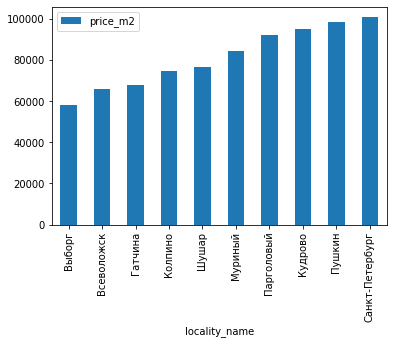

In [574]:
top_locality = df['locality_name'].value_counts().sort_values(ascending=False).head(10)

(df
    .query('locality_name in @top_locality.index')
    .pivot_table(index='locality_name', values='price_m2', aggfunc='median')
    .sort_values('price_m2')
    .plot(kind='bar')
)

,Col1,Col2,X
0,-0.466869,-0.791259,A
1,-0.537155,0.205682,A
2,-0.311773,-1.047944,A
3,-2.138260,-1.152279,A
4,-0.316366,1.383838,A
5,-0.738885,0.844302,B
6,-0.882864,-0.964179,B
7,0.013704,0.253331,B
8,0.912224,1.005208,B
9,0.035978,0.238738,B


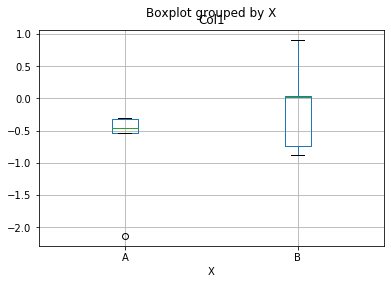

In [413]:
import numpy as np

data = pd.DataFrame(np.random.randn(10, 2), columns=['Col1', 'Col2'])
data['X'] = pd.Series(['A', 'A', 'A', 'A', 'A','B', 'B', 'B', 'B', 'B'])
boxplot = data.boxplot('Col1', by='X')
data

## Блок задач 4. Квартиры в центре

### Превью
1. Какая область входит в центр? Определить границу «Центральной зоны».
2. Отличаются ли эти параметры: площадь, цена, число комнат, высота потолков? Отличаются ли он от общих выводов по всему городу?
6. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

### Какая область входит в центр?

In [154]:
#df_piter['city_centers_nearest'] = df['city_centers_nearest'] / 1000 # Почему это не работает?
#df_piter.reset_index()
#df_piter[df_piter['city_center_nearest'] >= 3]

In [155]:
df_piter = df[df['locality_name'] == 'Санкт-Петербург']

Средняя цена кв.м. за каждый километр от центра Санкт-Петербурга


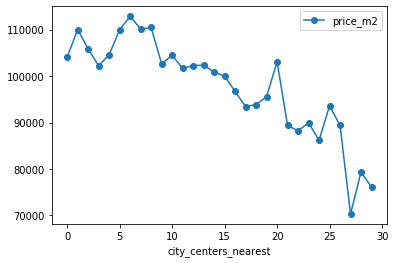

In [156]:
(df_piter
     .groupby('city_centers_nearest').agg({'last_price':'median', 'price_m2':'median'})
     .reset_index()
     .plot(x='city_centers_nearest', y='price_m2', style='o-')
)

print('Средняя цена кв.м. за каждый километр от центра Санкт-Петербурга')

Средняя цена квартиры за каждый километр от центра Санкт-Петербурга


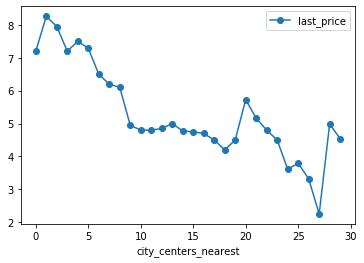

In [157]:
(df_piter
     .groupby('city_centers_nearest').agg({'last_price':'median', 'price_m2':'median'})
     .reset_index()
     .plot(x='city_centers_nearest', y='last_price', style='o-')
)

print('Средняя цена квартиры за каждый километр от центра Санкт-Петербурга')

**Выводы**
1. В понятие «Центральная зона» входит область до 3 км от центра города.
2. Также есть еще одна яркая выраженная зона с 3 до 10 км, назову ее «близко к центр»

**Интерсная особенность:** на расстояние от 5 до 3 км от центра цена снижается, хотя до этого она непрерывно росла с 16 км. Могу объяснить данную особенность тем, что именно в этом радиусе протекает Нева, огибающая полукругом центральный район Санкт-Петербурга. 

Цена домов с видом на Неву значительно выше. Если рассматривать 2 дома: с видом на Неву и на удалении от нее, то первый вариант однозначно более удачный. Если бы разница в цене квартиры была невелика (например, 7,5 млн, и 7,650 млн, это 1-2%), то покупатели выбирали бы квартиру с видом на Неву. Но сейчас она составляет 8,5%, а это существенно.

**Еще одна интересная особенность** — падение цены на расстоянии менее 1 кв от центра. Это также легко объяснимо, возможные причны:
1. В центре старые дома, возможно с неудачной планировкой или требующие реконструкции
2. В центре шумно, людно, как следствие некомфортно жить

### Сравниваю площадь, цену, число комнат и высоту потолков в центре и в остальном городе

**Создаю 2 среза для центральной зоны и остального города**

In [158]:
piter_center = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest < 3').reset_index()
piter_town = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest >= 3').reset_index()

### Сравниваю площадь

In [159]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по кол-ву комнат с расчетом средней площади
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_rooms = piter_center.pivot_table(index='rooms', values='total_area', aggfunc='median').reset_index()
piter_town_rooms = piter_town.pivot_table(index='rooms', values='total_area', aggfunc='median').reset_index()
comparison = piter_center_rooms.merge(piter_town_rooms, on='rooms')
comparison['town_to_center'] = comparison['total_area_x']/comparison['total_area_y']
comparison['town_to_center_percent'] = ((comparison['town_to_center'] * 100) - 100).round(0)
comparison

,rooms,total_area_x,total_area_y,town_to_center,town_to_center_percent
0,1,39.55,37.0,1.068919,7.0
1,2,60.65,52.7,1.150854,15.0
2,3,78.60,68.9,1.140784,14.0
3,4,94.25,86.0,1.095930,10.0
4,5,115.95,113.2,1.024293,2.0
5,6,131.40,124.4,1.056270,6.0


**В центре площадь 1-4- кмнатных квартир больше на 9-14%**. В квадратных метрах это означает, что, например, стандартная двушка в центре на 7 кв.м. больше такой же квартиры в другой части города. 

Площадь 5- и 6-комнатных квартир отличается всего на 2 и 6%. Но я не буду развивать этот вывод, т.к. эта работа оказалась итак слишком затратной по-времени.

### Как отличается цена за кв.м.

In [160]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по кол-ву комнат с расчетом медианной цены за кв.м.
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_price_m2 = piter_center.pivot_table(index='rooms', values='price_m2', aggfunc='median').reset_index()
piter_town_price_m2 = piter_town.pivot_table(index='rooms', values='price_m2', aggfunc='median').reset_index()
comparison = piter_center_price_m2.merge(piter_town_price_m2, on='rooms')
comparison['price_m2_change'] = comparison['price_m2_x']/comparison['price_m2_y']
comparison['price_m2_percent'] = ((comparison['price_m2_change'] * 100) - 100).round(0)
comparison

,rooms,price_m2_x,price_m2_y,price_m2_change,price_m2_percent
0,1,125595.0,109302,1.149064,15.0
1,2,117283.0,101220,1.158694,16.0
2,3,106172.0,91176,1.164473,16.0
3,4,94666.5,84831,1.115942,12.0
4,5,87883.5,79259,1.108814,11.0
5,6,55450.0,77751,0.713174,-29.0


**Стоимость кв.м. квартир в центре больше на 11-18%.**

**Особенность:** 6-комнатные квартиры за пределами центра дороже на 29%.

### Число комнат

**Рассчитаю среднее и медиану для центра и остального города**

In [161]:
piter_center['rooms'].describe()

count    246.000000
mean       2.792683
std        0.965585
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64

In [162]:
piter_town['rooms'].describe()

count    12632.000000
mean         1.989471
std          0.906682
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

**В центре города квартиры больше, в среднем, на 1-одну комнату**

### Высота потолков

In [163]:
piter_center['ceiling_height'].describe()

count    246.000000
mean       2.979675
std        0.339709
min        2.500000
25%        2.700000
50%        2.865000
75%        3.200000
max        4.300000
Name: ceiling_height, dtype: float64

In [164]:
piter_town['ceiling_height'].describe()

count    12632.000000
mean         2.696298
std          0.182505
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

**В центре потолки выше на 30 см**

### Этаж и дата размещения

#### Динамика по годам

In [165]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по году с расчетом средней площади
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_year = piter_center.pivot_table(index='year_exposition', values='price_m2', aggfunc='median').reset_index()
piter_town_year = piter_town.pivot_table(index='year_exposition', values='price_m2', aggfunc='median').reset_index()
comparison = piter_center_year.merge(piter_town_year, on='year_exposition', suffixes=('_center', '_town'))
comparison['price_m2_change'] = comparison['price_m2_center']/comparison['price_m2_town']
comparison['price_m2_percent'] = ((comparison['price_m2_change'] * 100) - 100).round(0)

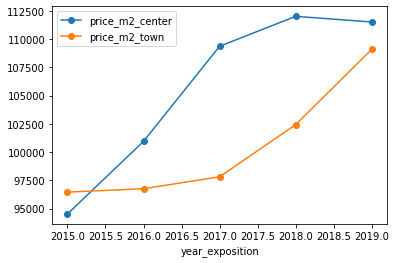

In [166]:
comparison.plot(x='year_exposition', y=['price_m2_center', 'price_m2_town'], style='o-')

**Цена на квартиры в центре росла даже в 2015-2017 годах, когда остальной рынок находился в «просадке».**

#### Динамика по месяцам

In [167]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по месяцам с расчетом средней площади
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_year = piter_center.pivot_table(index='month_exposition', values='price_m2', aggfunc='median').reset_index()
piter_town_year = piter_town.pivot_table(index='month_exposition', values='price_m2', aggfunc='median').reset_index()
comparison = piter_center_year.merge(piter_town_year, on='month_exposition', suffixes=('_center', '_town'))
comparison['price_m2_change'] = comparison['price_m2_center']/comparison['price_m2_town']
comparison['price_m2_percent'] = ((comparison['price_m2_change'] * 100) - 100).round(0)

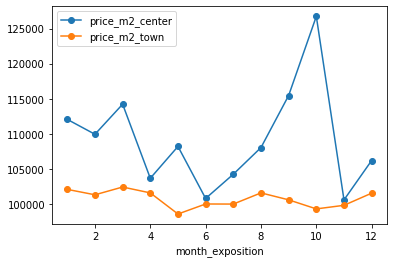

In [168]:
comparison.plot(x='month_exposition', y=['price_m2_center', 'price_m2_town'], style='o-')

**Недвижимость в центре растет в цене перед новым годом.** Что логично, если рассматривать эти квартиры как инвестицию. Конец года, конец наогового периода, идеальнео время для стратегических покупок.

#### Динамика по дням

In [169]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по дням с расчетом средней площади
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_year = piter_center.pivot_table(index='day_exposition', values='price_m2', aggfunc='median').reset_index()
piter_town_year = piter_town.pivot_table(index='day_exposition', values='price_m2', aggfunc='median').reset_index()
comparison = piter_center_year.merge(piter_town_year, on='day_exposition', suffixes=('_center', '_town'))
comparison['price_m2_change'] = comparison['price_m2_center']/comparison['price_m2_town']
comparison['price_m2_percent'] = ((comparison['price_m2_change'] * 100) - 100).round(0)

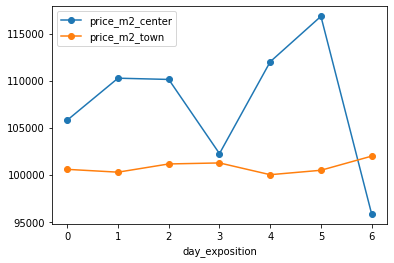

In [170]:
comparison.plot(x='day_exposition', y=['price_m2_center', 'price_m2_town'], style='o-')

**Недвижимость в центре, размещенная в субботу, дороже на 25%, чем она же, размещенная в четверг.**
- Сейчас видно, что в общий график по всему городу, который я строил ранее, пики и падения внесла именно недвижимость в центре Петербурга.
- Для остальной части города наблюдается логичное равномерное распределение по дням неделю.

**Предполагаю, что данная особенность связана с особенностями покупки недвижимости юр.лицами**

### Анализирую параметры

#### Как зависит цена квадратного метра от площади

In [171]:
#df_piter = df_piter[df_piter['city_center_nearest'] >= 3]
#df_piter_center = df_piter[df_piter['city_center_nearest'] < 3]

**Центр Санкт-Петербурга**

Коэффициент корреляции для центра Санкт-Петербрга: -0.6112445085397586


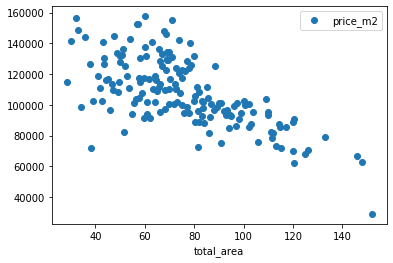

In [172]:
(df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest < 3')
     .pivot_table(index='total_area', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='total_area', y='price_m2', style='o')
)

print('Коэффициент корреляции для центра Санкт-Петербрга:', 
        (df
            .query('locality_name == "Санкт-Петербург" and city_centers_nearest < 3')['total_area']
            .corr(df.query('locality_name == "Санкт-Петербург" and city_centers_nearest < 3')['price_m2'])
))

**Остальной город**

Коэффициент корреляции для всего города (за исключением центра): -0.2349125353876342


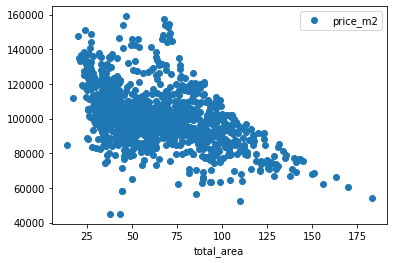

In [173]:
(df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest >= 3')
     .pivot_table(index='total_area', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='total_area', y='price_m2', style='o')
)

print('Коэффициент корреляции для всего города (за исключением центра):', 
      (df
           .query('locality_name == "Санкт-Петербург" and city_centers_nearest > 3')['total_area']
           .corr(df.query('locality_name == "Санкт-Петербург" and city_centers_nearest >= 3')['price_m2'])
))

**Ленинградская область**

Коэффициент корреляции для Ленинградской области: -0.14522172667368244


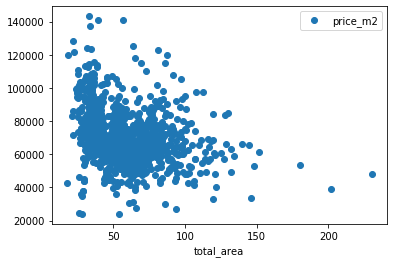

In [174]:
(df
     .query('locality_name != "Санкт-Петербург"')
     .pivot_table(index='total_area', values='price_m2', aggfunc='median')
     .reset_index()
     .plot(x='total_area', y='price_m2', style='o')
)

print('Коэффициент корреляции для Ленинградской области:', (
    df.query('locality_name != "Санкт-Петербург"')['total_area']
            .corr(df.query('locality_name != "Санкт-Петербург"')['price_m2'])
))

In [175]:
# Здесь я создаю 2 сводные таблицы, сгруппировав в каждой квартиры по кол-ву комнат с расчетом медианной цены за кв.м.
# Далее объединяю эти таблицы и добавляю к ним расчет разницы в цифрах и процентах

piter_center_price_m2 = piter_center.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
piter_town_price_m2 = piter_town.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
comparison = piter_center_price_m2.merge(piter_town_price_m2, on='rooms')
comparison['last_price_change'] = comparison['last_price_x']/comparison['last_price_y']
comparison['last_price_percent'] = ((comparison['last_price_change'] * 100) - 100).round(0)
comparison

,rooms,last_price_x,last_price_y,last_price_change,last_price_percent
0,1,4.8995,3.990,1.227945,23.0
1,2,6.9990,5.320,1.315602,32.0
2,3,8.4000,6.299,1.333545,33.0
3,4,9.0000,7.300,1.232877,23.0
4,5,10.1450,9.380,1.081557,8.0
5,6,6.7450,9.745,0.692150,-31.0


In [176]:
# Считаю цену 4-комнатной квартиры в центре
piter_center[(piter_center['rooms'] == 4) & (piter_center['year_exposition'] == 2019)]['last_price'].mean()

8.7375

**В центре города наблюдается интересная особенность: наибольшая корреляция между ценой за кв.м. и площадь. квартиры.** Это значит, что в центре выгоднее покупать именно боьшие квартиры. Трешка в центре дороже на 34%, однако 4-комнатные квартиры дороже «всего» на 25%.

**Гипотеза**. Предполагаю, что это связано с абсолютными занчениями цены. Средняя 4-кмонатная квартира в центре стоит почти 9 млн руб. Это покупка уже не приобритение недвижимости, а прежде всего инвестиция в нее.

# Шаг 5. Общий вывод

## Предложения разработчиками сервиса

**В форму продажи квартиру добавьте следующие поля для заполнения:**
1. Категория дома: хрущевка, брежневка, современаня панельная застройка, современная кирпичная, элитная застройка
2. Год постройки
3. Из какого материала сделана (панели дешевле кирпича)
4. Какой ремонт

**Измените механику обработки следующих значений:**
1. Параметры, характеризующие расстояние до объекта (до центра города, парка, аэропорта), и получаемые на основе картографических данных, делать кратными 50 м и переводить в целочисленный тип int64. Например, расстояние до центра в 5624 м заменять на 5600 м.

**Рассмотрите возможность сделать следующие параметры обязательными для заполнения:**
1. Ввести название города обязательным пунктом. Чтобы не было ситуации, когда город продажи объявления неизвестен.
2. Площадь кухни
3. Количество этажей
4. Жилая площадь
5. Высота потолков

**Заметка. Для каждой категории дома данные выше можно заполнять автоматически:**
- Например, для брежневок типичная площадь кухни: 6,3 м, жила площадь: 73% от общей, высота потолков: 2,7 м.

**Наведите порядок в названия населенных пунктов:** 
- Разделить само название от названия категории и выделить категорию в отдельный параметр. 
- Категории: город, село, поселок, станция, поселок дачного типа.  На данный момент 93 названия являются дублями.
- В полученной базе 93 названия были дублями.


## Какие особенности были обнаружены

- Шумность гистограммы распределния площадей квартир объясняется наличием типовых застроек: хрущевки, брежневки, современные дома. Первая и вторая категория дает 3 заметных пика для 1-, 2- и 3-комнатных квартир.
- Площадь квартир современной типовой застройки больше всего на 3-7 кв.м, в зависимости от кол-ва комнат. Фактически, главное отличие в площади современных квартир от позднесоветских панелек — более большие кухни.
- В кризис 2014-2016 годов продавали, преимущественно, дешевые квартиры не в центре Санкт-Петербурга.
- В 2019 году квартиры формально стоят на 10% дешевле, чем о кризиса. Но это иллюзия, они просто стали меньше по-площади. Цена за кв.м. выросла на 8,5%.
- Цена кв.м. дорогой недвижимости росла даже в период кризиса, в отличии от типичной застройки. Это легко объяснимо, такая недвижимость — это прежде всего инвестиция.
- Такая инвестиционная недвижимость в котябре стоит на 25% дороже, чем в среднем за год. Скорее всего, это объясняется особенностями проведения дорогих сделок. Также, цена в объявления таких квартир выше на 25%, если это объявление размещено в субботу. Возможная причина: шабат. Но это не точно :) 

## От чего зависит стоимость квартиры?

**Кратко:**
1. От числа комнат (это очевидно).
2. От высоты потолков (высота выше, чем 2,7 м — квартира дороже).
3. От площади кухни (больше 7 кв.м. — квартира дороже).
4. От удаленности от центра (центр — это до 3 км. город — от 3 до 10, пригород — свыше 10).
5. От месяца и года продажи (самые дорогие квартиры в апреле, мая, октябре и ноябре) (идеальное время для покупки — июнь). Особенность: для квартир в центре зависит даже от дня (размещенные на продажу в субботу квартиры дороже на 25%).
6. От типа постройки: хрущевка, брежневка, современный эконом или премиум. Тип постройки я устанавливал, используя сочетание параметров.

**Далее я задумался об ответе на вопрос «Ваша задача — установить параметры».**
- Мне эта задача не понятна.
- Выводы, описанные выше — очевидны. Исследование разве что внесло минимальные границы, очерченные цифрами. 
- Как эту информацию применять заказчику? Разве что статью написать. Но из легенду мы знаем, что цель в другом, цитата: «Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.»

**Чтобы отследить аномалии и мошенническую деятельность — нужна модель расчета цены**
- Без расчета цены невозможно понять, что квартиру разместил мошенник. Потому что ради цены он ее и размещает. Скорее всего, показать клиенту, что в этом районе есть квартиры куда дороже той, что он продает. Или наоборот, продавить цену неадекватно низкой ценой.
- Для установления границ, по которым некое объявление будет отнесено к «аномалии» требует расчетов, которых нет в чек листе этого проекта.

**В итоге я интерпретирую задачу «Ваша задача — установить параметры», как «Создать модель расчета ожидаемой рыночной цены квартиры».** Границы аномалий устаналивать не буду, это необязательно и трудозатратно.

Чтобы создать модель расчета рыночной цены, я применил следующую логику:
- Создаю эталон квартиры (сочетание параметров), тем смым получив базу для расчета.
- Последовательно Изменяя параметры эталона, делаю конкретные выводы в цифрах, как тот и или иной параметр изменяет цену.

**Эталон: хрущевка далеко от центра**

In [177]:
# Хрущевка далеко от центра: более 10 км от центра, меньше или равно 5 этажей в доме, кухня меньше 7 кв.м., потолки ниже 2.7

hrush = (df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest > 10 and kitchen_area < 7 and floors_total <= 5 and ceiling_height < 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

### Сравниваю типы домов в том же районе

**1. Брежневка в тех же условиях**

In [178]:
# Количество этажей 7 или более

breznev = (df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest > 10 and kitchen_area < 7 and floors_total >= 7 and ceiling_height <= 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [179]:
compare = (((breznev / hrush) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,6.5,4.6
2,10.3,5.6
3,16.1,0.7
4,54.2,2.6
5,NaN,NaN


- Однушка в стандартной панельной девятиэтажке обойдется на 6.5% дороже, чем в хрущевке, двушка на 10%, а вот трехкомнатная на 16%.
- 4-х комнатная дороже на 54%, но цена кв.м. дороже всего на 0,7%. Что говорит о значительно большей квадратуре.
- 5-комнатных квартир в таких домах нет.

**2. Современный дом с кухней увеличенной площади**

Заметка: именно увеличенная площадь кухни является отичием домов современной постройки. Кухня в хрущевках и брежневках откровенно маленькая.

In [180]:
# Изменяю параметр: площадь кухни больше 7

sovremen_econom = (df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest > 10 and kitchen_area > 7 and floors_total >= 4 and ceiling_height <= 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [181]:
compare = (((sovremen_econom / hrush) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,30.6,7.5
2,41.0,15.2
3,49.4,7.0
4,72.2,-0.7
5,NaN,NaN
6,NaN,NaN


- Самые массовые 1-, 2- и 3-комнатыне квартиры дороже на 31, 41 и 49%.
- При этом цена кв.м. выросла куда меньше.
- Цена кв.м. двушки является самой дорогой.

**3. Современный дом с кухней увеличенной площади против брежневки**

In [182]:
compare = (((sovremen_econom / breznev) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,22.7,2.8
2,27.9,9.1
3,28.7,6.3
4,11.6,-3.2
5,41.7,7.6
6,NaN,NaN


- За большую кухню придется отдать на 25-30% больше.
- Как и впредыдущем сравнении, 2-х комнатные квартиры самые дорогие за кв.м.

**4. Преимальная застройка против хрущевки (интрига интрига)**

In [183]:
# Изменяю параметр: площадь кухни больше 7, высота потолков больше 2.7, 

premium = (df
     .query('locality_name == "Санкт-Петербург" and city_centers_nearest > 10 and kitchen_area > 7 and floors_total >= 4 and ceiling_height > 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [184]:
compare = (((premium / hrush) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,53.2,16.6
2,80.8,29.7
3,95.4,15.4
4,88.0,8.0
5,NaN,NaN


- Однушки дороже на 50%
- А 2, 3 и 4-комнатные почти в 2 раза.

**5. Премиальная застройка против современной бюджетной квартиры**

In [185]:
compare = (((premium / sovremen_econom) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,17.3,8.5
2,28.2,12.6
3,30.8,7.8
4,9.2,8.8
5,16.5,-19.4
6,NaN,NaN


- Однушки дороже на 16%.
- 2-, 3-комнатные на 30%.
- А вот 4-комнатные всего на 9,2%

### Удаленность от центра

**1. Хрущевка ближе к центру против хрущевки с окраин**

In [186]:
# Хрущевка близко к центру
# Изменяю параметр: расстояние от центра от 3 до 10 км, меньше или равно 5 этажей в доме, кухня меньше 7 кв.м., потолки ниже 2.7

hrush_blizko_centre = (df
     .query('locality_name == "Санкт-Петербург" and 3 <= city_centers_nearest < 10 and kitchen_area < 7 and floors_total <= 5 and ceiling_height < 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [187]:
compare = (((hrush_blizko_centre / hrush) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,11.0,8.9
2,10.2,10.7
3,13.8,4.5
4,NaN,NaN


- Ого, дороже на 10-12%

**2. Брежневка ближе к центру**

In [188]:
# Изменяю параметр: расстояние от центра от 3 до 10 км

breznev_blizko_centre = (df
     .query('locality_name == "Санкт-Петербург" and 3 <= city_centers_nearest < 10 and kitchen_area < 7 and floors_total >= 7 and ceiling_height <= 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [189]:
compare = (((breznev_blizko_centre / breznev) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,7.6,9.5
2,9.3,15.9
3,20.3,11.5
4,NaN,NaN
5,NaN,NaN


- Транспортная доступность облегчает кошелек на 8-9%, если хочется однушку или двушку.
- И аж на 20%, если кому то захочется брежневку поближе к центру города.

**3. Современная бюджетная квартира ближе к центру**

In [190]:
# Изменяю параметр: расстояние от центра от 3 до 10 км

sovremen_econom_blizko_centre = (df
     .query('locality_name == "Санкт-Петербург" and 3 <= city_centers_nearest < 10 and kitchen_area > 7 and floors_total >= 4 and ceiling_height <= 2.7')
     .pivot_table(index='rooms', values=['last_price', 'price_m2'], aggfunc='median')
)

In [191]:
compare = (((sovremen_econom_blizko_centre / sovremen_econom) * 100) - 100).round(1)
compare

,last_price,price_m2
rooms,,
1,22.2,16.3
2,22.7,14.1
3,21.9,12.1
4,24.6,8.8
5,23.5,5.5
6,-0.5,-7.3


- Расстояние имеет значение, такая квартира стоит дороже на 20-30%

# Здесь я закончу описание вывода для параметров

- Уверен, логику вы поняли.
- Дальнейшее описание лишено здравого смысла.

**Ответ на поставленную задачу «Ваша задача — установить параметры.» такой:** таких параметров как минимум 170 и для каждого есть свой коэффициент изменения цены.

Почему 170? Возьмем только 1-комнатные квартиры, только last_price:
- Высота потолков: 2 категории (меньше 2,7, больше 2,7)
- Удаленность от центра: 3 категории (центр до 3 км, сам город 3-10 км, пригороды дальше 10 км)
- Этаж: первый, последний, другой
- Месяц продажи: да даже не 12, но как минимум есть 4 категории (пик апреля, пик перед новым годом, спад в июне, до и после НГ)
- И так далее...

Для каждой квартиры выходит 7 параметров, в каждом параметре 2-4 категории, и это только для цены продажи. А есть еще цена за кв.м. Итого я насчитал 170 вариантов, для каждого из которых есть свой коэффициент, который увеличивает базовую стоимость квартиры.